In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/COMP4331 Group project/covid_train.csv")

In [ ]:
import numpy as np
np.random.seed(333)

In [ ]:
df.head(25)

country_name country_code  ...  total_cases  new_cases_percentages
0               Kyrgyzstan          KGZ  ...         3151                      2
1                    Italy          ITA  ...       239706                      1
2                   Canada          CAN  ...       131495                      2
3                  Bolivia          BOL  ...        45565                      3
4                  Austria          AUT  ...        23875                      2
5           Czech Republic          CZE  ...         9824                      1
6                 Malaysia          MYS  ...         7009                      0
7              New Zealand          NZL  ...         1212                      0
8                  Ukraine          UKR  ...        14195                      2
9   Libyan Arab Jamahiriya          LBY  ...          989                      1
10      Dominican Republic          DOM  ...        89867                      3
11                   Egypt          EGY  ...        97148                      0
12                    Oman          OMN  ...        24524                      3
13              Costa Rica          CRI  ...        39699                      3
14                Colombia          COL  ...        23003                      2
15                  Israel          ISR  ...        26257                      3
16              Uzbekistan          UZB  ...         2509                      0
17                 Morocco          MAR  ...         6870                      1
18                  Israel          ISR  ...        74903                      3
19               Indonesia          IDN  ...        26940                      0
20                 Bolivia          BOL  ...       120241                      3
21            South Africa          ZAF  ...        40792                      3
22          United Kingdom          GBR  ...       303181                      2
23                 Ukraine          UKR  ...        49607                      2
24                   Kenya          KEN  ...        20636                      2

[25 rows x 92 columns]

In [ ]:
df.shape

(3864, 92)

In [ ]:
df.describe()

pop_total  pop_density  ...   total_cases  new_cases_percentages
count  3.864000e+03  3828.000000  ...  3.864000e+03            3864.000000
mean   5.167601e+07   283.358697  ...  9.281446e+04               1.499741
std    1.406536e+08  1010.567694  ...  3.134845e+05               1.116557
min    2.087946e+06     3.247871  ...  1.200000e+01               0.000000
25%    6.975761e+06    46.719504  ...  3.388000e+03               1.000000
50%    1.851393e+07    92.056413  ...  1.767950e+04               1.000000
75%    4.707678e+07   205.418372  ...  6.342675e+04               2.000000
max    1.366418e+09  7952.998418  ...  4.659984e+06               3.000000

[8 rows x 90 columns]

In [ ]:
df.columns

Index(['country_name', 'country_code', 'pop_total', 'pop_density', 'GDP',
       'basic_water', 'safe_water', 'basic_san', 'safe_san',
       'C1_School closing_1', 'C1_School closing_2', 'C1_School closing_3',
       'C2_Workplace closing_1', 'C2_Workplace closing_2',
       'C2_Workplace closing_3', 'C3_Cancel public events_1',
       'C3_Cancel public events_2', 'C4_Restrictions on gatherings_1',
       'C4_Restrictions on gatherings_2', 'C4_Restrictions on gatherings_3',
       'C4_Restrictions on gatherings_4', 'C5_Close public transport_1',
       'C5_Close public transport_2', 'C6_Stay at home requirements_1',
       'C6_Stay at home requirements_2', 'C6_Stay at home requirements_3',
       'C7_Restrictions on internal movement_1',
       'C7_Restrictions on internal movement_2',
       'C8_International travel controls_1',
       'C8_International travel controls_2',
       'C8_International travel controls_3',
       'C8_International travel controls_4', 'E1_Income support_1',

# Question 1

In [ ]:
df_1=df.drop_duplicates(subset ="country_code",keep = 'first', inplace = False) 
df_1.shape

(107, 92)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(df_1[df_1.columns[2:9]])
df_1[df_1.columns[2:9]]=imp_mean.transform(df_1[df_1.columns[2:9]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
from sklearn.preprocessing import StandardScaler
numeric=df_1.columns[2:9]
for i in numeric:
    df_1[i] = StandardScaler().fit_transform(df_1[i].values.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [ ]:
Q1 = df_1[numeric].quantile(0.25)
Q3 = df_1[numeric].quantile(0.75)
IQR = Q3 - Q1

df_1 = df_1[~((df_1[numeric] < (Q1 - 1.5 * IQR)) |(df_1[numeric] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df_1.head()

country_name country_code  ...  total_cases  new_cases_percentages
0   Kyrgyzstan          KGZ  ...         3151                      2
1        Italy          ITA  ...       239706                      1
2       Canada          CAN  ...       131495                      2
3      Bolivia          BOL  ...        45565                      3
4      Austria          AUT  ...        23875                      2

[5 rows x 92 columns]

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

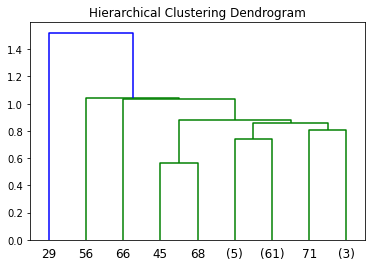

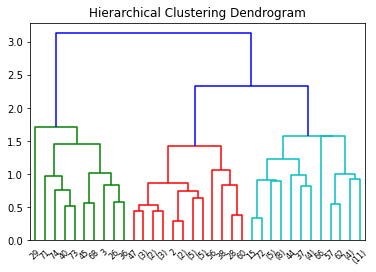

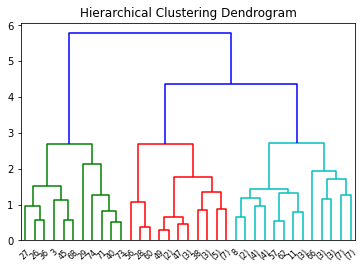

In [ ]:
#import numpy as np
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
df_2=df_1.drop(df_1.columns[9:], axis=1)
df_2=df_2.drop(df_1.columns[0:2], axis=1)
linkage=['single','average','complete']
for i in linkage:
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,linkage=i)
    model = model.fit(df_2)
    plt.title('Hierarchical Clustering Dendrogram')
    plot_dendrogram(model, truncate_mode='level', p=5)
    plt.show()

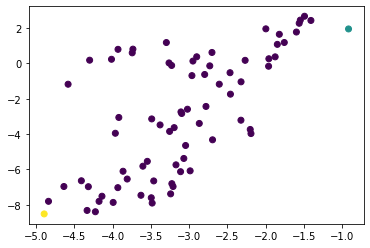

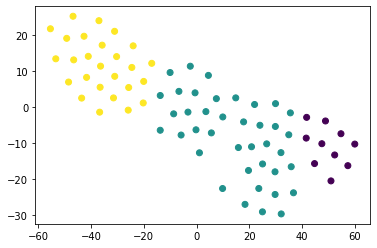

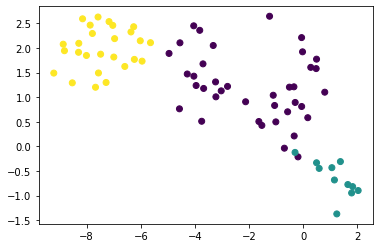

In [ ]:
from sklearn.manifold import TSNE
linkage=['single','average','complete']
for i in linkage:
    model = AgglomerativeClustering(n_clusters=3,linkage=i)
    model = model.fit_predict(df_2)
    df_tsne=TSNE(n_components=2).fit_transform(df_2)
    plt.scatter(df_tsne[:,0],df_tsne[:,1],c=model)
    plt.show()

In [ ]:
from sklearn.metrics import davies_bouldin_score
linkage=['single','average','complete']
for i in linkage:
    model = AgglomerativeClustering(n_clusters=3,linkage=i)
    model = model.fit_predict(df_2)
    print(davies_bouldin_score(df_2, model))

0.5137742665128471
0.7733178860340701
0.819269481106398


In [ ]:
from sklearn.metrics import silhouette_score
linkage=['single','average','complete']
for i in linkage:
    model = AgglomerativeClustering(n_clusters=3,linkage=i)
    model = model.fit_predict(df_2)
    print(silhouette_score(df_2, model))

0.10201944334301274
0.42968049502721356
0.4138670479526472


In [ ]:
df_names=df.drop_duplicates(subset ="country_code",keep = 'first', inplace = False) 
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(df_names[df_names.columns[2:9]])
df_names[df_names.columns[2:9]]=imp_mean.transform(df_names[df_names.columns[2:9]])
Q1 = df_names[numeric].quantile(0.25)
Q3 = df_names[numeric].quantile(0.75)
IQR = Q3 - Q1
df_names = df_names[~((df_names[numeric] < (Q1 - 1.5 * IQR)) |(df_names[numeric] > (Q3 + 1.5 * IQR))).any(axis=1)]
df_group=df_names.drop(df_names.columns[9:], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
model = AgglomerativeClustering(n_clusters=3,linkage='average')
model = model.fit_predict(df_2)
model
df_group['Class'] = model
df_group

country_name country_code   pop_total  ...  basic_san   safe_san  Class
0     Kyrgyzstan          KGZ   6456900.0  ...  96.507067  43.456656      1
1          Italy          ITA  60297396.0  ...  98.772433  96.208014      2
2         Canada          CAN  37589262.0  ...  99.286013  82.316398      2
3        Bolivia          BOL  11513100.0  ...  60.716938  22.938271      0
4        Austria          AUT   8877067.0  ...  99.972910  96.746738      2
..           ...          ...         ...  ...        ...        ...    ...
297      Denmark          DNK   5818553.0  ...  99.597229  94.840348      2
311        Nepal          NPL  28608710.0  ...  62.053595  23.527279      0
322         Iraq          IRQ  39309783.0  ...  94.121022  41.067753      1
683      Senegal          SEN  16296364.0  ...  51.473990  21.455765      0
767         Mali          MLI  19658031.0  ...  39.335420  18.709404      0

[75 rows x 10 columns]

In [ ]:
df_group_class0=df_group.loc[df_group.Class == 0]
df_group_class0.country_name

3                               Bolivia
40                            Guatemala
48     Lao People's Democratic Republic
60                                 Peru
69                             Cambodia
75                              Myanmar
255                           Nicaragua
311                               Nepal
683                             Senegal
767                                Mali
Name: country_name, dtype: object

In [ ]:
df_group_class0.describe()

pop_total  pop_density           GDP  ...  basic_san   safe_san  Class
count  1.000000e+01    10.000000     10.000000  ...  10.000000  10.000000   10.0
mean   2.094376e+07    74.055834   6468.767884  ...  62.543983  32.059497    0.0
std    1.428360e+07    61.137676   3379.900334  ...  11.095004  12.594602    0.0
min    6.545502e+06    10.480146   2423.828765  ...  39.335420  18.709404    0.0
25%    1.270892e+07    26.392651   3811.473443  ...  59.599459  22.184779    0.0
50%    1.654528e+07    67.982832   5493.235881  ...  63.193140  29.038677    0.0
75%    2.637104e+07    89.629179   8784.341511  ...  72.023001  38.969355    0.0
max    5.404542e+07   195.939107  13380.364420  ...  74.459410  58.053590    0.0

[8 rows x 8 columns]

In [ ]:
df_group_class1=df_group.loc[df_group.Class == 1]
df_group_class1.country_name

0                  Kyrgyzstan
8                     Ukraine
9      Libyan Arab Jamahiriya
10         Dominican Republic
11                      Egypt
12                       Oman
13                 Costa Rica
14                   Colombia
16                 Uzbekistan
17                    Morocco
21               South Africa
28                El Salvador
30                    Vietnam
31                 Azerbaijan
32                    Algeria
41       Moldova, Republic of
56                   Paraguay
59                   Thailand
62     Bosnia and Herzegovina
64                    Ecuador
70                     Jordan
72                  Venezuela
73                  Sri Lanka
74                     Serbia
79                    Albania
101                   Tunisia
104                   Croatia
105                    Turkey
113                  Honduras
128                    Panama
147                   Uruguay
175                Kazakhstan
182                   Romania
223       

In [ ]:
df_group_class1.describe()

pop_total  pop_density           GDP  ...   basic_san   safe_san  Class
count  3.900000e+01    39.000000     39.000000  ...   39.000000  39.000000   39.0
mean   2.464838e+07    95.322751  17489.428637  ...   92.347198  52.087110    1.0
std    2.666615e+07    91.084068   8003.124202  ...    6.657334  17.906308    0.0
min    2.657637e+06     3.795632   5470.811536  ...   75.747098  16.986489    1.0
25%    6.455226e+06    38.857146  11833.434120  ...   87.787643  41.539256    1.0
50%    1.073896e+07    77.029671  15643.731450  ...   94.258505  52.535786    1.0
75%    3.789078e+07   101.742866  22700.898870  ...   97.453477  64.635585    1.0
max    1.003881e+08   360.017362  35948.191960  ...  100.000001  80.554925    1.0

[8 rows x 8 columns]

In [ ]:
df_group_class2=df_group.loc[df_group.Class == 2]
df_group_class2.country_name

1                     Italy
2                    Canada
4                   Austria
5            Czech Republic
6                  Malaysia
7               New Zealand
22           United Kingdom
35                 Slovakia
37                   Kuwait
39                   Poland
44              Switzerland
51                   Greece
53                  Finland
55                 Portugal
57                   Sweden
63                   Norway
77                  Germany
78                  Hungary
80                 Slovenia
115            Saudi Arabia
122               Australia
123                 Ireland
138                  France
153    United Arab Emirates
194                   Spain
297                 Denmark
Name: country_name, dtype: object

In [ ]:
df_group_class2.describe()

pop_total  pop_density           GDP  ...   basic_san    safe_san  Class
count  2.600000e+01    26.000000     26.000000  ...   26.000000   26.000000   26.0
mean   2.341429e+07   108.033904  49811.061718  ...   98.929310   90.460826    2.0
std    2.378461e+07    77.052477  13900.266243  ...    1.691049    7.606282    0.0
min    2.087946e+06     3.247871  29525.577360  ...   91.245181   75.639872    2.0
25%    5.594874e+06    36.399485  41045.950625  ...   98.778477   83.457854    2.0
50%    1.027744e+07   107.554727  49171.831160  ...   99.255525   93.315917    2.0
75%    3.675908e+07   137.145556  55992.944715  ...   99.820011   96.535138    2.0
max    8.313280e+07   274.708982  88240.901030  ...  100.000000  100.000000    2.0

[8 rows x 8 columns]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


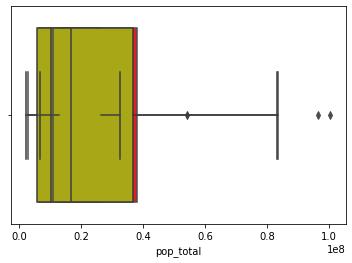

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


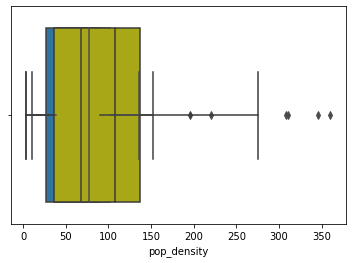

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


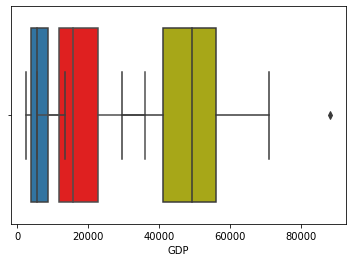

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


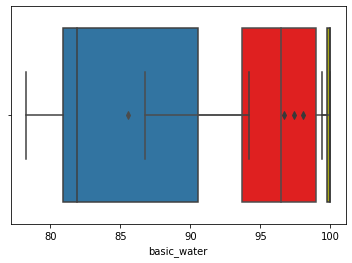

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


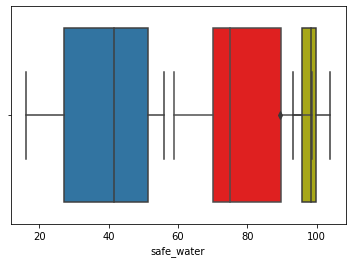

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


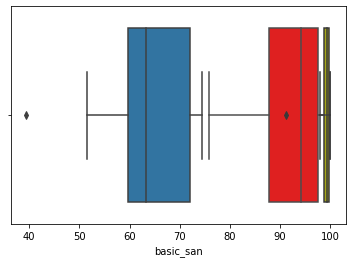

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


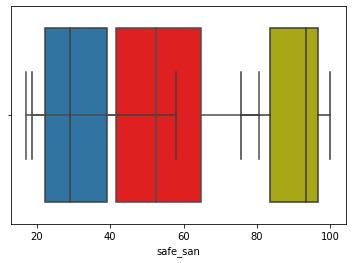

In [ ]:
import seaborn as sns
for i in numeric:
    sns.boxplot(df_group_class0[i])
    sns.boxplot(df_group_class1[i],color='r')
    sns.boxplot(df_group_class2[i],color='y')
    plt.show()

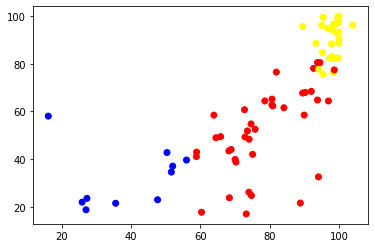

In [ ]:
color_map = []
for c in df_group.Class:
    if c == 0:
        color_map.append('blue')
    elif c == 1:
        color_map.append('red') 
    else:
        color_map.append('yellow') 
plt.scatter(df_group['safe_water'],df_group['safe_san'],c=color_map)

In [ ]:
df_1_numeric= df_1[numeric]
df_1_numeric.shape

(75, 7)

# Question 2

In [ ]:
policiesData = ["C1_School closing_1", "C1_School closing_2","C1_School closing_3","C2_Workplace closing_1",
               "C2_Workplace closing_2", "C2_Workplace closing_3", "C3_Cancel public events_1", "C3_Cancel public events_2",
               "C4_Restrictions on gatherings_1", "C4_Restrictions on gatherings_2", "C4_Restrictions on gatherings_3",
               "C4_Restrictions on gatherings_4", "C5_Close public transport_1", "C5_Close public transport_2",
               "C6_Stay at home requirements_1", "C6_Stay at home requirements_2", "C6_Stay at home requirements_3",
               "C7_Restrictions on internal movement_1", "C7_Restrictions on internal movement_2", 
               "C8_International travel controls_1", "C8_International travel controls_2", "C8_International travel controls_3",
               "C8_International travel controls_4", "E1_Income support_1", "E1_Income support_2", "E2_Debt/contract relief_1",
               "E2_Debt/contract relief_2", "H1_Public information campaigns_1","H1_Public information campaigns_2",
               "H2_Testing policy_1","H2_Testing policy_2","H2_Testing policy_3","H3_Contact tracing_1",
               "H3_Contact tracing_2", "H6_Facial Coverings_1","H6_Facial Coverings_2", "H6_Facial Coverings_3",
               "H6_Facial Coverings_4"]

In [ ]:
df_group0 = df_group[df_group["Class"]==0]
df_0 = df.loc[df_group0.index]
df_0_policiesdata = df_0[policiesData]
    
df_group1 = df_group[df_group["Class"]==1]
df_1 = df.loc[df_group1.index]
df_1_policiesdata = df_1[policiesData]


df_group2 = df_group[df_group["Class"]==2]
df_2 = df.loc[df_group2.index]
df_2_policiesdata = df_2[policiesData]


In [ ]:
policy = []
for row in range(len(df_0_policiesdata)):
    store = []
    count = 0
    for item in df_0_policiesdata.values[row]:
        if item == 1: store.append(df_0_policiesdata.columns[count])
        count += 1
    policy.append(store)


In [ ]:
import itertools
all_combinations = []
for record in policy:
    for r in range(len(record) + 1):
        combinations_object = itertools.combinations(record, r)
        combinations_list = list(combinations_object)
        all_combinations += combinations_list
all_combinations = filter(None, all_combinations)

combination0 = dict()
for item in all_combinations:
    if item not in combination0.keys():
        combination0[item] = 1    
    else:combination0[item] += 1

store = []
for item, value in combination0.items():
    if value < 0.3 * len(df_0_policiesdata):
        store.append(item)

for item in store:
    del combination0[item]

In [ ]:
df_0_withclass = df_0_policiesdata.copy()
df_0_withclass["class"] = df.loc[df_0_withclass.index]["new_cases_percentages"]

In [ ]:
df_0 = df_0_policiesdata.copy()
df_0["class"] = df.loc[df_0.index]["new_cases_percentages"]

In [ ]:
count = 0
row1 = []
for row in df_0_withclass.values:
    for item in row:
        if item > 1:row1.append(count)
    count += 1
           
policy1 = []
for item in row1 :
    store = []
    count = 0
    for element in df_0_policiesdata.values[item]:
        if element == 1: store.append(df_0_policiesdata.columns[count])
        count += 1
    policy1.append(store)  

In [ ]:
import itertools
all_combinations_class23 = []
for record in policy1:
    for r in range(len(record) + 1):
        combinations_object = itertools.combinations(record, r)
        combinations_list = list(combinations_object)
        all_combinations_class23 += combinations_list
        
combination_class23 = dict()
for item in all_combinations_class23:
    if item not in combination_class23.keys():
        combination_class23[item] = 1    
    else:combination_class23[item] += 1
        
store = []
for item, value in combination0.items():
    if item in combination_class23.keys():
        if combination_class23[item]/combination0[item] > 0.4: 
            store.append(item) 
for item in store:
    del combination0[item]
    
policy_combination_group0 = []
for item in combination0.keys():
    policy_combination_group0.append(item)
    
policy_combination_group0

[('H1_Public information campaigns_2',),
 ('H2_Testing policy_1',),
 ('H3_Contact tracing_1',),
 ('C1_School closing_3', 'H2_Testing policy_1'),
 ('C2_Workplace closing_2', 'H3_Contact tracing_1'),
 ('C3_Cancel public events_2', 'H2_Testing policy_1'),
 ('C3_Cancel public events_2', 'H3_Contact tracing_1'),
 ('H1_Public information campaigns_2', 'H2_Testing policy_1'),
 ('H1_Public information campaigns_2', 'H3_Contact tracing_1'),
 ('C1_School closing_3', 'C3_Cancel public events_2', 'H2_Testing policy_1'),
 ('C1_School closing_3',
  'H1_Public information campaigns_2',
  'H2_Testing policy_1'),
 ('C2_Workplace closing_2',
  'C3_Cancel public events_2',
  'H3_Contact tracing_1'),
 ('C2_Workplace closing_2',
  'H1_Public information campaigns_2',
  'H3_Contact tracing_1'),
 ('C3_Cancel public events_2',
  'H1_Public information campaigns_2',
  'H2_Testing policy_1'),
 ('C3_Cancel public events_2',
  'H1_Public information campaigns_2',
  'H3_Contact tracing_1'),
 ('C1_School closing_3'

In [ ]:
policy = []
for row in range(len(df_1_policiesdata)):
    store = []
    count = 0
    for item in df_1_policiesdata.values[row]:
        if item == 1: store.append(df_1_policiesdata.columns[count])
        count += 1
    policy.append(store)


In [ ]:
import itertools
all_combinations = []
for record in policy:
    for r in range(len(record) + 1):
        combinations_object = itertools.combinations(record, r)
        combinations_list = list(combinations_object)
        all_combinations += combinations_list
all_combinations = filter(None, all_combinations)

combination1 = dict()
for item in all_combinations:
    if item not in combination1.keys():
        combination1[item] = 1    
    else:combination1[item] += 1

store = []
for item, value in combination1.items():
    if value < 0.3 * len(df_1_policiesdata):
        store.append(item)

for item in store:
    del combination1[item]

In [ ]:
df_1_withclass = df_1_policiesdata.copy()
df_1_withclass["class"] = df.loc[df_1_withclass.index]["new_cases_percentages"]

In [ ]:
count = 0
row1 = []
for row in df_1_withclass.values:
    for item in row:
        if item > 1:row1.append(count)
    count += 1
           
policy1 = []
for item in row1 :
    store = []
    count = 0
    for element in df_1_policiesdata.values[item]:
        if element == 1: store.append(df_1_policiesdata.columns[count])
        count += 1
    policy1.append(store) 

In [ ]:
import itertools
all_combinations_class23 = []
for record in policy1:
    for r in range(len(record) + 1):
        combinations_object = itertools.combinations(record, r)
        combinations_list = list(combinations_object)
        all_combinations_class23 += combinations_list
        
combination_class23 = dict()
for item in all_combinations_class23:
    if item not in combination_class23.keys():
        combination_class23[item] = 1    
    else:combination_class23[item] += 1
        
store = []
for item, value in combination1.items():
    if item in combination_class23.keys():
        if combination_class23[item]/combination1[item] > 0.4: 
            store.append(item) 
for item in store:
    del combination1[item]
    
policy_combination_group1 = []
for item in combination1.keys():
    policy_combination_group1.append(item)
    
policy_combination_group1

[('C8_International travel controls_4',
  'H1_Public information campaigns_2',
  'H2_Testing policy_2'),
 ('C1_School closing_3',
  'C2_Workplace closing_2',
  'C8_International travel controls_4',
  'H1_Public information campaigns_2'),
 ('C1_School closing_3',
  'C8_International travel controls_4',
  'H1_Public information campaigns_2',
  'H2_Testing policy_2'),
 ('C3_Cancel public events_2',
  'C8_International travel controls_4',
  'H1_Public information campaigns_2',
  'H2_Testing policy_2'),
 ('C1_School closing_3',
  'C3_Cancel public events_2',
  'C8_International travel controls_4',
  'H1_Public information campaigns_2',
  'H2_Testing policy_2')]

In [ ]:
policy = []
for row in range(len(df_2_policiesdata)):
    store = []
    count = 0
    for item in df_2_policiesdata.values[row]:
        if item == 1: store.append(df_2_policiesdata.columns[count])
        count += 1
    policy.append(store)

In [ ]:
import itertools
all_combinations = []
for record in policy:
    for r in range(len(record) + 1):
        combinations_object = itertools.combinations(record, r)
        combinations_list = list(combinations_object)
        all_combinations += combinations_list
all_combinations = filter(None, all_combinations)

combination2 = dict()
for item in all_combinations:
    if item not in combination2.keys():
        combination2[item] = 1    
    else:combination2[item] += 1

store = []
for item, value in combination2.items():
    if value < 0.3 * len(df_2_policiesdata):
        store.append(item)

for item in store:
    del combination2[item]

In [ ]:
df_2_withclass = df_2_policiesdata.copy()
df_2_withclass["class"] = df.loc[df_2_withclass.index]["new_cases_percentages"]

In [ ]:
count = 0
row1 = []
for row in df_2_withclass.values:
    for item in row:
        if item > 1:row1.append(count)
    count += 1
           
policy1 = []
for item in row1 :
    store = []
    count = 0
    for element in df_2_policiesdata.values[item]:
        if element == 1: store.append(df_2_policiesdata.columns[count])
        count += 1
    policy1.append(store)

In [ ]:
import itertools
all_combinations_class23 = []
for record in policy1:
    for r in range(len(record) + 1):
        combinations_object = itertools.combinations(record, r)
        combinations_list = list(combinations_object)
        all_combinations_class23 += combinations_list
        
combination_class23 = dict()
for item in all_combinations_class23:
    if item not in combination_class23.keys():
        combination_class23[item] = 1    
    else:combination_class23[item] += 1
        
store = []
for item, value in combination2.items():
    if item in combination_class23.keys():
        if combination_class23[item]/combination2[item] > 0.4: 
            store.append(item) 
for item in store:
    del combination2[item]
    
policy_combination_group2 = []
for item in combination2.keys():
    policy_combination_group2.append(item)
    
policy_combination_group2

[('C2_Workplace closing_2',),
 ('C3_Cancel public events_2',),
 ('C6_Stay at home requirements_1',),
 ('E2_Debt/contract relief_2',),
 ('H1_Public information campaigns_2',),
 ('H2_Testing policy_2',),
 ('H3_Contact tracing_2',),
 ('C1_School closing_3', 'C2_Workplace closing_2'),
 ('C1_School closing_3', 'C6_Stay at home requirements_1'),
 ('C1_School closing_3', 'E2_Debt/contract relief_2'),
 ('C1_School closing_3', 'H3_Contact tracing_2'),
 ('C2_Workplace closing_2', 'C3_Cancel public events_2'),
 ('C2_Workplace closing_2', 'C6_Stay at home requirements_1'),
 ('C2_Workplace closing_2', 'E2_Debt/contract relief_2'),
 ('C2_Workplace closing_2', 'H1_Public information campaigns_2'),
 ('C2_Workplace closing_2', 'H3_Contact tracing_2'),
 ('C3_Cancel public events_2', 'C6_Stay at home requirements_1'),
 ('C3_Cancel public events_2', 'E2_Debt/contract relief_2'),
 ('C3_Cancel public events_2', 'H1_Public information campaigns_2'),
 ('C3_Cancel public events_2', 'H3_Contact tracing_2'),
 ('

In [ ]:
def convertTuple(tup): 
    str =  ', '.join(tup) 
    return str

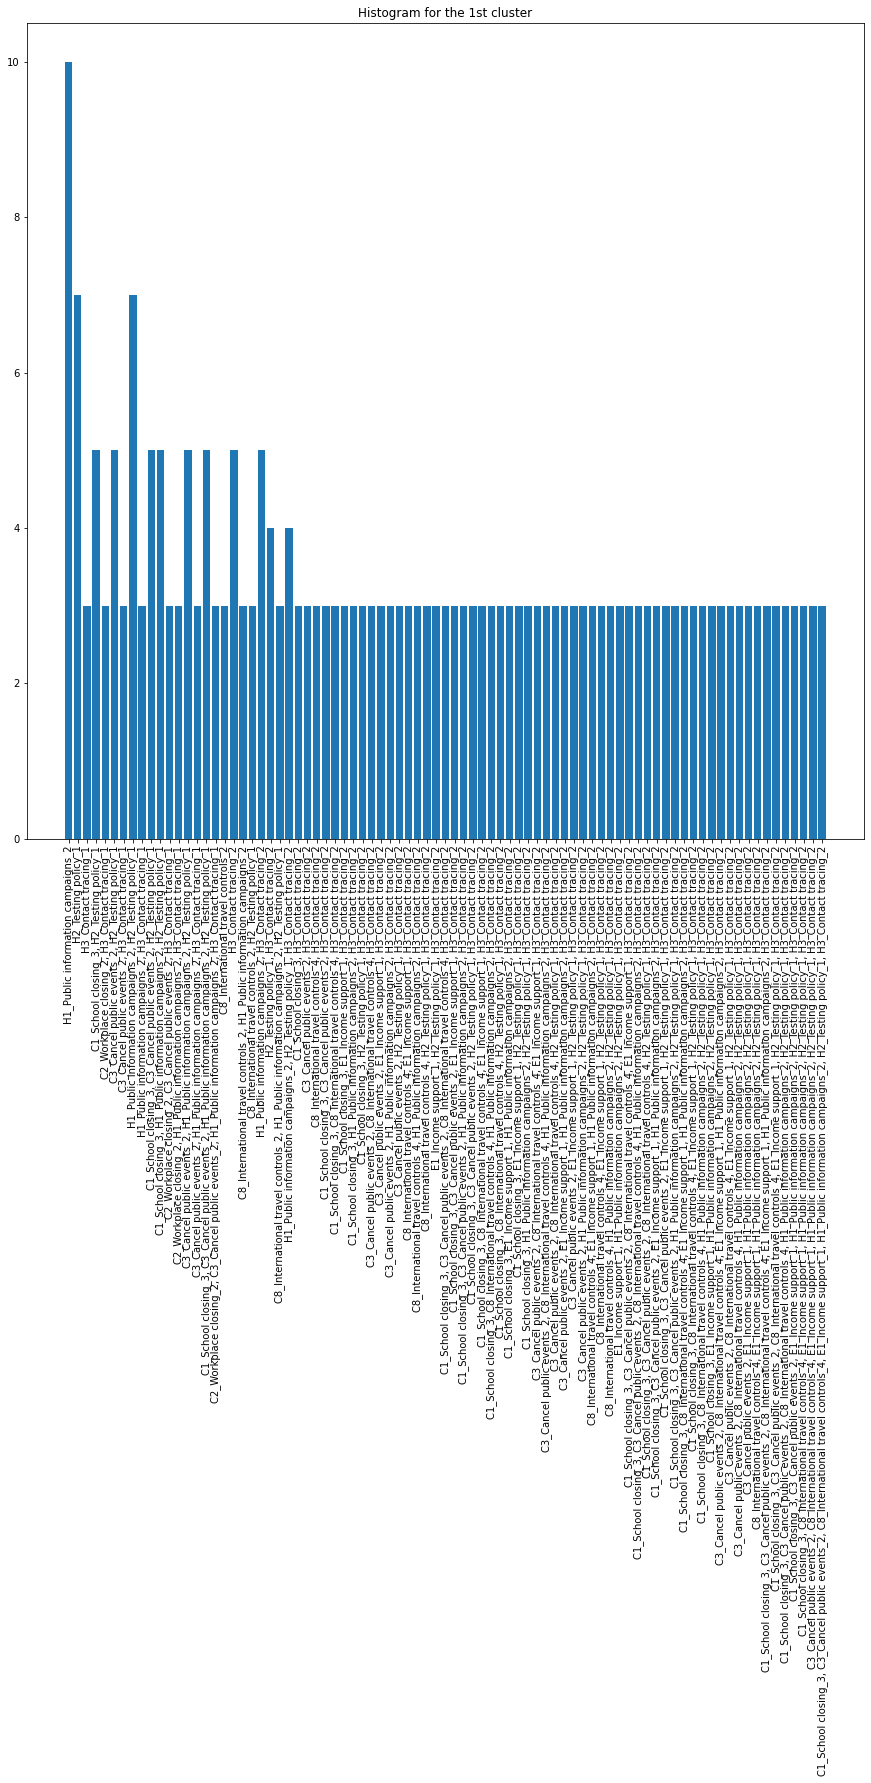

In [ ]:
labels=[]
for i in combination0:
    labels.append(convertTuple(i))

values=combination0.values()

plt.figure(figsize = (15,15))
plt.title("Histogram for the 1st cluster")
plt.bar(labels,values)
plt.xticks(rotation=90)
plt.show()

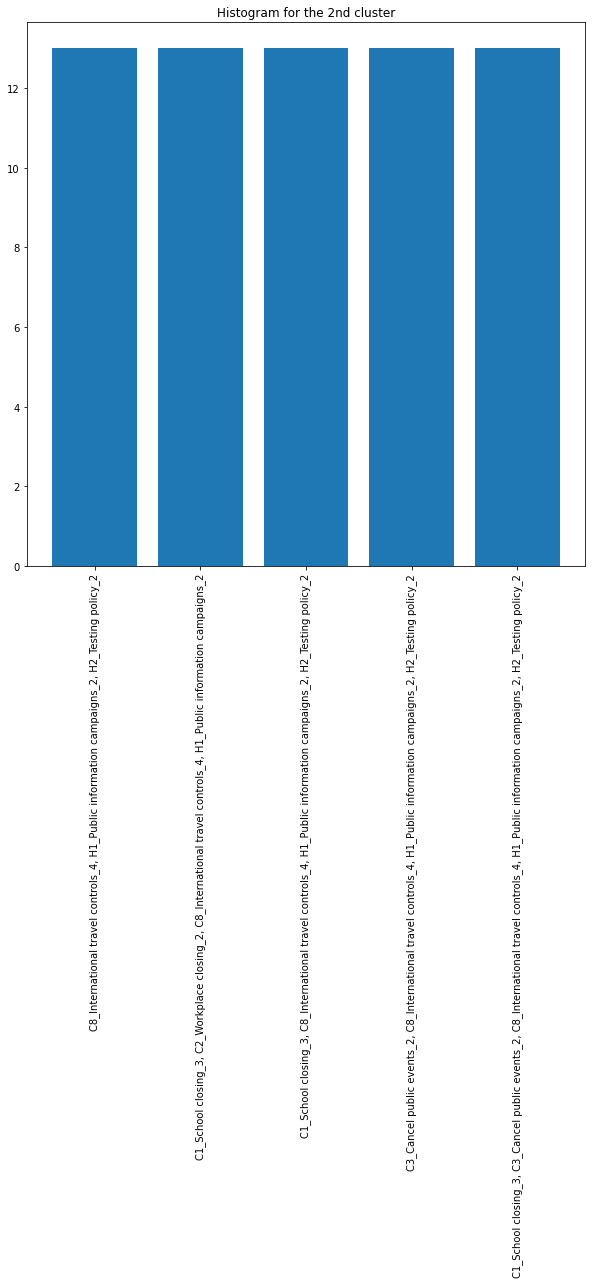

In [ ]:
labels=[]
for i in combination1:
    labels.append(convertTuple(i))

values=combination1.values()

plt.figure(figsize = (10,10))
plt.title("Histogram for the 2nd cluster")
plt.bar(labels,values)
plt.xticks(rotation=90)
plt.show()

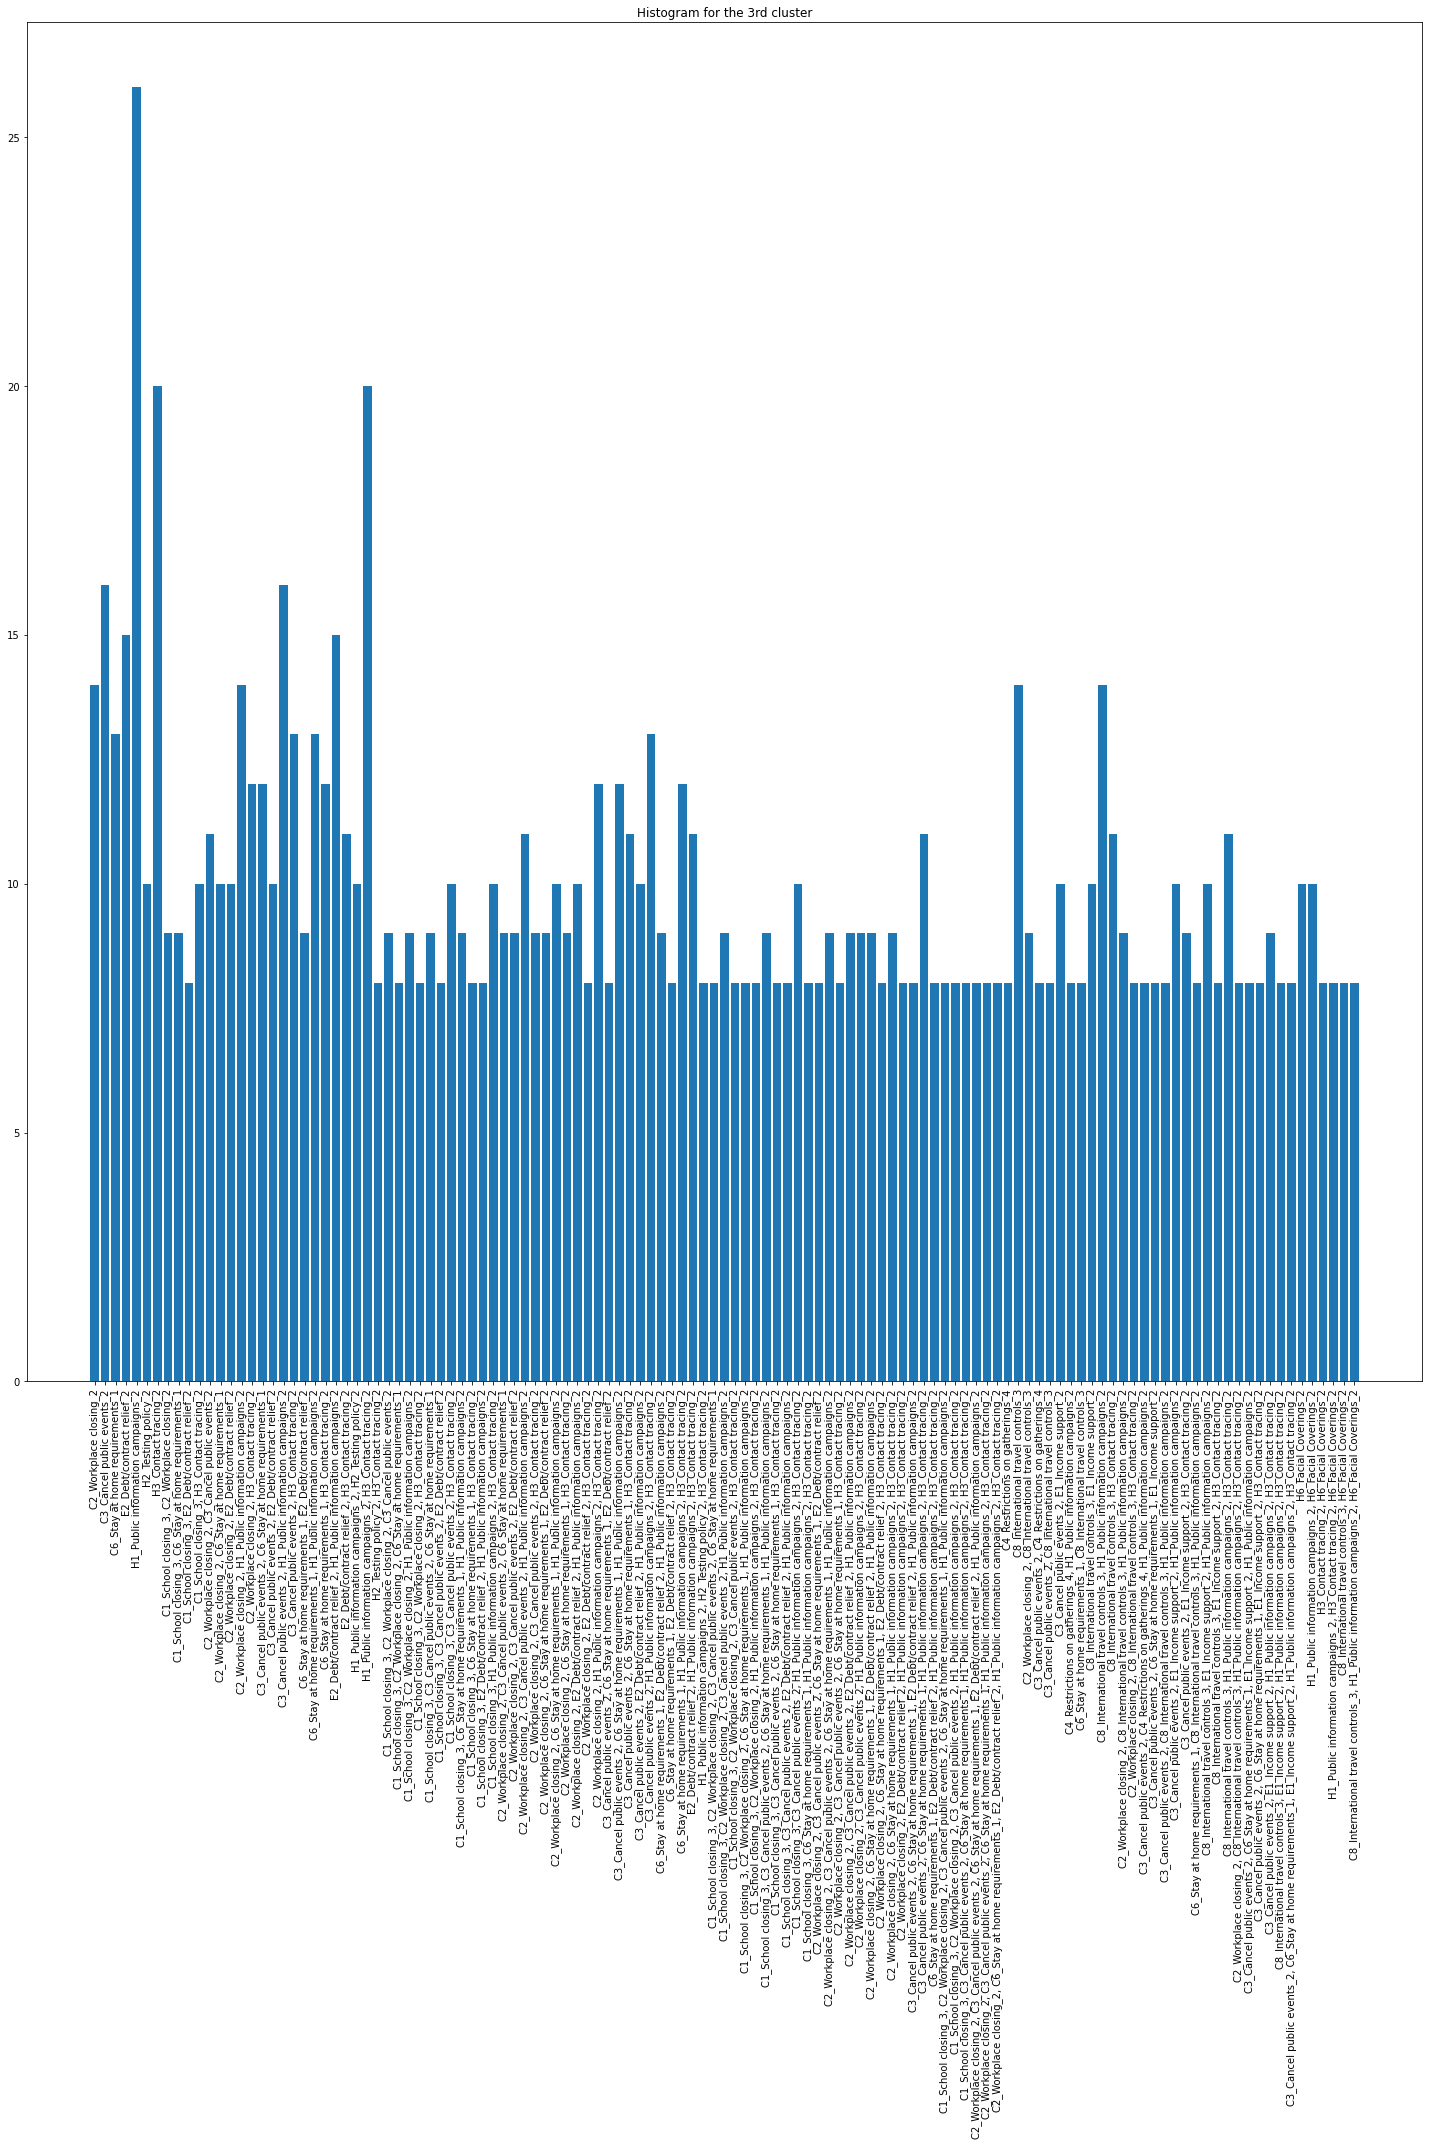

In [ ]:
labels=[]
for i in combination2:
    labels.append(convertTuple(i))

values=combination2.values()

plt.figure(figsize = (25,25))
plt.title("Histogram for the 3rd cluster")
plt.bar(labels,values)
plt.xticks(rotation=90)
plt.show()

# Question 3

In [ ]:
# import numpy as np
# np.random.seed(333)

In [ ]:
df_3_Columns=df.columns.tolist()
index_start=df_3_Columns.index('pct_fever_weighted')
index_end=df_3_Columns.index('pct_chills_weighted')
symptomsCol=df_3_Columns[index_start:index_end+1]
symptomsData=df[symptomsCol]
symptomsData.shape

(3864, 13)

In [ ]:
median_dict={}
for i in symptomsCol:
    median_dict[i]=symptomsData[i].median()
    
median_dict

{'pct_aches_muscle_pain_weighted': 14.495000000000001,
 'pct_anosmia_ageusia_weighted': 2.4266666669999997,
 'pct_chest_pain_weighted': 4.16,
 'pct_chills_weighted': 3.343333333,
 'pct_cough_weighted': 9.6466666665,
 'pct_difficulty_breathing_weighted': 3.906666667,
 'pct_eye_pain_weighted': 7.045,
 'pct_fatigue_weighted': 19.07666667,
 'pct_fever_weighted': 1.983333333,
 'pct_headache_weighted': 17.74666667,
 'pct_nausea_weighted': 4.5,
 'pct_sore_throat_weighted': 7.0033333335000005,
 'pct_stuffy_runny_nose_weighted': 14.37333333}

In [ ]:
Transformed_symptoms_data=pd.DataFrame()
for i in symptomsCol:
    Transformed_symptoms_data[i] = (symptomsData[i] > median_dict[i]).astype(int)
Transformed_symptoms_data.head()

pct_fever_weighted  pct_cough_weighted  pct_difficulty_breathing_weighted  \
0                   1                   0                                  0   
1                   0                   0                                  0   
2                   0                   0                                  0   
3                   1                   1                                  1   
4                   0                   1                                  1   

   pct_fatigue_weighted  pct_stuffy_runny_nose_weighted  \
0                     1                               1   
1                     0                               0   
2                     0                               1   
3                     1                               1   
4                     1                               0   

   pct_aches_muscle_pain_weighted  pct_sore_throat_weighted  \
0                               1                         1   
1                               0                         0   
2                               1                         0   
3                               1                         1   
4                               0                         0   

   pct_chest_pain_weighted  pct_nausea_weighted  pct_anosmia_ageusia_weighted  \
0                        0                    1                             1   
1                        0                    0                             0   
2                        0                    0                             0   
3                        1                    1                             1   
4                        0                    0                             0   

   pct_eye_pain_weighted  pct_headache_weighted  pct_chills_weighted  
0                      1                      1                    1  
1                      0                      0                    0  
2                      0                      0                    0  
3                      1                      1                    1  
4                      0                      0                    0

(a) Extract all symptom combinations that appear in at least 20% of all the records.

In [ ]:
from mlxtend.frequent_patterns import apriori
frequent_symptoms= apriori(Transformed_symptoms_data, min_support=0.2, use_colnames=True)
frequent_symptoms

support                                           itemsets
0     0.499224                               (pct_fever_weighted)
1     0.500000                               (pct_cough_weighted)
2     0.499224                (pct_difficulty_breathing_weighted)
3     0.499482                             (pct_fatigue_weighted)
4     0.499741                   (pct_stuffy_runny_nose_weighted)
...        ...                                                ...
2300  0.216615  (pct_sore_throat_weighted, pct_aches_muscle_pa...
2301  0.200052  (pct_sore_throat_weighted, pct_nausea_weighted...
2302  0.202381  (pct_sore_throat_weighted, pct_aches_muscle_pa...
2303  0.204193  (pct_sore_throat_weighted, pct_nausea_weighted...
2304  0.205745  (pct_sore_throat_weighted, pct_aches_muscle_pa...

[2305 rows x 2 columns]

Define the total number of cases in percentage of population as:

total cases / pop total * 100

This is considered high if it is larger than or equal to the corresponding median. Among all the symptom combinations obtained in part (a) above, find those that appear in at least 60% of all records and have high total number of cases in percentage of population.

In [ ]:
df_3=df
df_3['cases_by_percent']=df_3['total_cases']/df_3['pop_total']*100
median_dict['cases_by_percent']=df_3['cases_by_percent'].median()
df_3['High_cases_percent'] = (df_3['cases_by_percent'] > median_dict['cases_by_percent']).astype(int)
high_cases_df_3=Transformed_symptoms_data
high_cases_df_3['High_cases_percent']=df_3['High_cases_percent']
high_cases_df_3.head()

pct_fever_weighted  pct_cough_weighted  pct_difficulty_breathing_weighted  \
0                   1                   0                                  0   
1                   0                   0                                  0   
2                   0                   0                                  0   
3                   1                   1                                  1   
4                   0                   1                                  1   

   pct_fatigue_weighted  pct_stuffy_runny_nose_weighted  \
0                     1                               1   
1                     0                               0   
2                     0                               1   
3                     1                               1   
4                     1                               0   

   pct_aches_muscle_pain_weighted  pct_sore_throat_weighted  \
0                               1                         1   
1                               0                         0   
2                               1                         0   
3                               1                         1   
4                               0                         0   

   pct_chest_pain_weighted  pct_nausea_weighted  pct_anosmia_ageusia_weighted  \
0                        0                    1                             1   
1                        0                    0                             0   
2                        0                    0                             0   
3                        1                    1                             1   
4                        0                    0                             0   

   pct_eye_pain_weighted  pct_headache_weighted  pct_chills_weighted  \
0                      1                      1                    1   
1                      0                      0                    0   
2                      0                      0                    0   
3                      1                      1                    1   
4                      0                      0                    0   

   High_cases_percent  
0                   0  
1                   1  
2                   1  
3                   1  
4                   1

In [ ]:
high_cases_symptom_combinations = apriori(high_cases_df_3, min_support=0.2, use_colnames=True)
high_cases_symptom_combinations

support                                           itemsets
0     0.499224                               (pct_fever_weighted)
1     0.500000                               (pct_cough_weighted)
2     0.499224                (pct_difficulty_breathing_weighted)
3     0.499482                             (pct_fatigue_weighted)
4     0.499741                   (pct_stuffy_runny_nose_weighted)
...        ...                                                ...
2349  0.216615  (pct_sore_throat_weighted, pct_aches_muscle_pa...
2350  0.200052  (pct_sore_throat_weighted, pct_nausea_weighted...
2351  0.202381  (pct_sore_throat_weighted, pct_aches_muscle_pa...
2352  0.204193  (pct_sore_throat_weighted, pct_nausea_weighted...
2353  0.205745  (pct_sore_throat_weighted, pct_aches_muscle_pa...

[2354 rows x 2 columns]

In [ ]:
from mlxtend.frequent_patterns import association_rules
rules=association_rules(high_cases_symptom_combinations, metric="confidence", min_threshold=0.6)
rules['highcases_by_percent_is_consequent']=rules['consequents'].apply(lambda f: 1 if  len(f.intersection(['High_cases_percent']))==1 else 0)
high_cases_rules=rules[(rules['highcases_by_percent_is_consequent']==1)]
high_cases_rules['consequent_length']=high_cases_rules['consequents'].apply(lambda x: len(x))
high_cases_rules=high_cases_rules[high_cases_rules['consequent_length']==1]
high_cases_rules['antecedent_length']=high_cases_rules['antecedents'].apply(lambda x: len(x))
high_cases_rules

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


antecedents           consequents  \
61                  (pct_difficulty_breathing_weighted)  (High_cases_percent)   
75                     (pct_stuffy_runny_nose_weighted)  (High_cases_percent)   
437   (pct_cough_weighted, pct_difficulty_breathing_...  (High_cases_percent)   
469   (pct_cough_weighted, pct_stuffy_runny_nose_wei...  (High_cases_percent)   
496   (pct_cough_weighted, pct_aches_muscle_pain_wei...  (High_cases_percent)   
517      (pct_sore_throat_weighted, pct_cough_weighted)  (High_cases_percent)   
627   (pct_difficulty_breathing_weighted, pct_stuffy...  (High_cases_percent)   
651   (pct_difficulty_breathing_weighted, pct_aches_...  (High_cases_percent)   
683   (pct_sore_throat_weighted, pct_difficulty_brea...  (High_cases_percent)   
721   (pct_nausea_weighted, pct_difficulty_breathing...  (High_cases_percent)   
747   (pct_difficulty_breathing_weighted, pct_chills...  (High_cases_percent)   
818   (pct_aches_muscle_pain_weighted, pct_stuffy_ru...  (High_cases_percent)   
839   (pct_sore_throat_weighted, pct_stuffy_runny_no...  (High_cases_percent)   
868   (pct_nausea_weighted, pct_stuffy_runny_nose_we...  (High_cases_percent)   
2924  (pct_cough_weighted, pct_difficulty_breathing_...  (High_cases_percent)   
3271  (pct_cough_weighted, pct_aches_muscle_pain_wei...  (High_cases_percent)   
3336  (pct_sore_throat_weighted, pct_cough_weighted,...  (High_cases_percent)   

      antecedent support  consequent support   support  confidence      lift  \
61              0.499224                 0.5  0.302536    0.606013  1.212027   
75              0.499741                 0.5  0.327899    0.656137  1.312273   
437             0.361801                 0.5  0.240683    0.665236  1.330472   
469             0.386646                 0.5  0.263975    0.682731  1.365462   
496             0.361284                 0.5  0.219720    0.608166  1.216332   
517             0.360507                 0.5  0.226190    0.627423  1.254846   
627             0.355331                 0.5  0.247930    0.697742  1.395484   
651             0.352226                 0.5  0.223085    0.633358  1.266716   
683             0.359990                 0.5  0.220756    0.613228  1.226456   
721             0.352743                 0.5  0.216097    0.612619  1.225238   
747             0.332298                 0.5  0.200569    0.603583  1.207165   
818             0.336698                 0.5  0.231625    0.687932  1.375865   
839             0.336439                 0.5  0.221532    0.658462  1.316923   
868             0.323758                 0.5  0.213251    0.658673  1.317346   
2924            0.307195                 0.5  0.220238    0.716933  1.433867   
3271            0.289337                 0.5  0.201605    0.696780  1.393560   
3336            0.297101                 0.5  0.205745    0.692509  1.385017   

      leverage  conviction  highcases_by_percent_is_consequent  \
61    0.052924    1.269079                                   1   
75    0.078028    1.454066                                   1   
437   0.059783    1.493590                                   1   
469   0.070652    1.575949                                   1   
496   0.039079    1.276051                                   1   
517   0.045937    1.342004                                   1   
627   0.070264    1.654217                                   1   
651   0.046972    1.363727                                   1   
683   0.040761    1.292751                                   1   
721   0.039726    1.290720                                   1   
747   0.034420    1.261297                                   1   
818   0.063276    1.602217                                   1   
839   0.053313    1.463964                                   1   
868   0.051372    1.464871                                   1   
2924  0.066641    1.766369                                   1   
3271  0.056936    1.648968                                   1   
3336  0.057195    1.62

Let S′ be the set of symptoms occurring the combinations obtained from part (b) above. Draw a histogram for the number of symptom combinations each symptom in S′ occurs in.

In [ ]:
Symp_comb_from_b=list(high_cases_rules['antecedents'])
Symp_comb_from_b

[frozenset({'pct_difficulty_breathing_weighted'}),
 frozenset({'pct_stuffy_runny_nose_weighted'}),
 frozenset({'pct_cough_weighted', 'pct_difficulty_breathing_weighted'}),
 frozenset({'pct_cough_weighted', 'pct_stuffy_runny_nose_weighted'}),
 frozenset({'pct_aches_muscle_pain_weighted', 'pct_cough_weighted'}),
 frozenset({'pct_cough_weighted', 'pct_sore_throat_weighted'}),
 frozenset({'pct_difficulty_breathing_weighted',
            'pct_stuffy_runny_nose_weighted'}),
 frozenset({'pct_aches_muscle_pain_weighted',
            'pct_difficulty_breathing_weighted'}),
 frozenset({'pct_difficulty_breathing_weighted', 'pct_sore_throat_weighted'}),
 frozenset({'pct_difficulty_breathing_weighted', 'pct_nausea_weighted'}),
 frozenset({'pct_chills_weighted', 'pct_difficulty_breathing_weighted'}),
 frozenset({'pct_aches_muscle_pain_weighted',
            'pct_stuffy_runny_nose_weighted'}),
 frozenset({'pct_sore_throat_weighted', 'pct_stuffy_runny_nose_weighted'}),
 frozenset({'pct_nausea_weighted'

In [ ]:
from itertools import chain, combinations

def powerset(iterable):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(1,len(s)+1))

def checksubset(x,y):
  for i in x:
    if i in y:
      continue
    return False
  return True

In [ ]:
s=set()
for i in Symp_comb_from_b:
  s.add(frozenset(powerset(i)))
sdash=set()
for i in s:
  for j in i:
    sdash.add(j)
sdash

{('pct_aches_muscle_pain_weighted',),
 ('pct_aches_muscle_pain_weighted', 'pct_stuffy_runny_nose_weighted'),
 ('pct_chills_weighted',),
 ('pct_cough_weighted',),
 ('pct_cough_weighted', 'pct_aches_muscle_pain_weighted'),
 ('pct_cough_weighted',
  'pct_aches_muscle_pain_weighted',
  'pct_stuffy_runny_nose_weighted'),
 ('pct_cough_weighted', 'pct_difficulty_breathing_weighted'),
 ('pct_cough_weighted',
  'pct_difficulty_breathing_weighted',
  'pct_stuffy_runny_nose_weighted'),
 ('pct_cough_weighted', 'pct_stuffy_runny_nose_weighted'),
 ('pct_difficulty_breathing_weighted',),
 ('pct_difficulty_breathing_weighted', 'pct_aches_muscle_pain_weighted'),
 ('pct_difficulty_breathing_weighted', 'pct_chills_weighted'),
 ('pct_difficulty_breathing_weighted', 'pct_stuffy_runny_nose_weighted'),
 ('pct_nausea_weighted',),
 ('pct_nausea_weighted', 'pct_difficulty_breathing_weighted'),
 ('pct_nausea_weighted', 'pct_stuffy_runny_nose_weighted'),
 ('pct_sore_throat_weighted',),
 ('pct_sore_throat_weighted

In [ ]:
countdict={}
for i in sdash:
  countdict[i]=0
for i in countdict:
  for j in Symp_comb_from_b:
    if checksubset(i,j):
      countdict[i]+=1
countdict

{('pct_aches_muscle_pain_weighted',): 4,
 ('pct_aches_muscle_pain_weighted', 'pct_stuffy_runny_nose_weighted'): 2,
 ('pct_chills_weighted',): 1,
 ('pct_cough_weighted',): 7,
 ('pct_cough_weighted', 'pct_aches_muscle_pain_weighted'): 2,
 ('pct_cough_weighted',
  'pct_aches_muscle_pain_weighted',
  'pct_stuffy_runny_nose_weighted'): 1,
 ('pct_cough_weighted', 'pct_difficulty_breathing_weighted'): 2,
 ('pct_cough_weighted',
  'pct_difficulty_breathing_weighted',
  'pct_stuffy_runny_nose_weighted'): 1,
 ('pct_cough_weighted', 'pct_stuffy_runny_nose_weighted'): 4,
 ('pct_difficulty_breathing_weighted',): 8,
 ('pct_difficulty_breathing_weighted', 'pct_aches_muscle_pain_weighted'): 1,
 ('pct_difficulty_breathing_weighted', 'pct_chills_weighted'): 1,
 ('pct_difficulty_breathing_weighted', 'pct_stuffy_runny_nose_weighted'): 2,
 ('pct_nausea_weighted',): 2,
 ('pct_nausea_weighted', 'pct_difficulty_breathing_weighted'): 1,
 ('pct_nausea_weighted', 'pct_stuffy_runny_nose_weighted'): 1,
 ('pct_sore

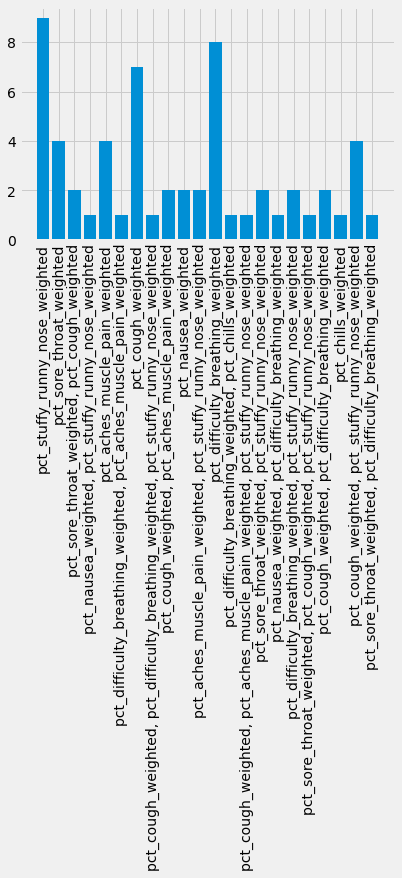

In [ ]:
def convertTuple(tup): 
    str =  ', '.join(tup) 
    return str
labels=[]
for i in countdict:
  labels.append(convertTuple(i))

values=countdict.values()

plt.bar(labels,values)
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_3_numeric= Transformed_symptoms_data
df_3_numeric.columns

Index(['pct_fever_weighted', 'pct_cough_weighted',
       'pct_difficulty_breathing_weighted', 'pct_fatigue_weighted',
       'pct_stuffy_runny_nose_weighted', 'pct_aches_muscle_pain_weighted',
       'pct_sore_throat_weighted', 'pct_chest_pain_weighted',
       'pct_nausea_weighted', 'pct_anosmia_ageusia_weighted',
       'pct_eye_pain_weighted', 'pct_headache_weighted', 'pct_chills_weighted',
       'High_cases_percent'],
      dtype='object')

# Question 4

In [ ]:
import matplotlib.pyplot as plt
# import numpy as np
import matplotlib
from scipy import stats


In [ ]:
df4 = df[['driving','walking','transit','retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline','pop_density','new_cases_percentages']].copy()
df4.shape

(3864, 11)

In [ ]:
labels= list(df4['new_cases_percentages'].unique())
labels.sort()
labels

[0, 1, 2, 3]

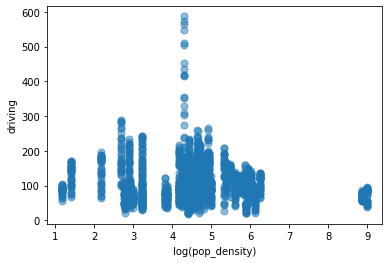

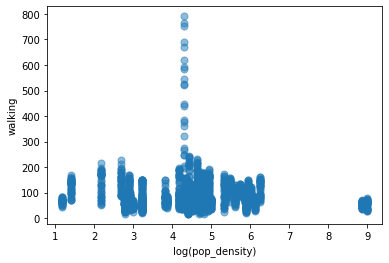

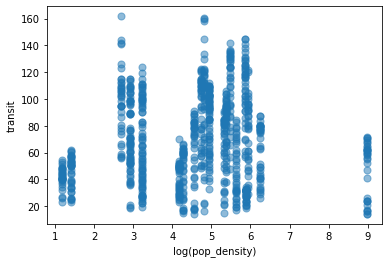

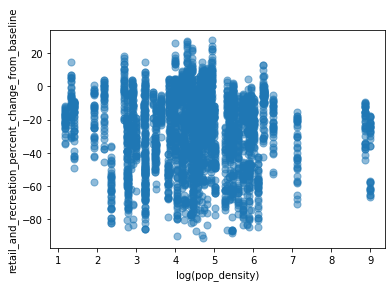

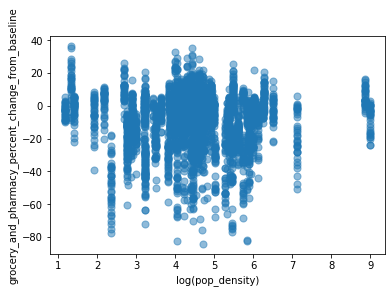

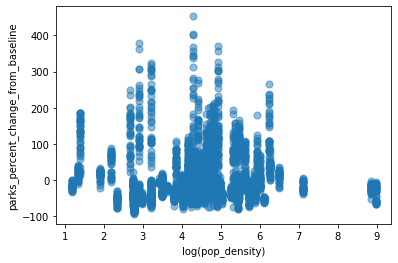

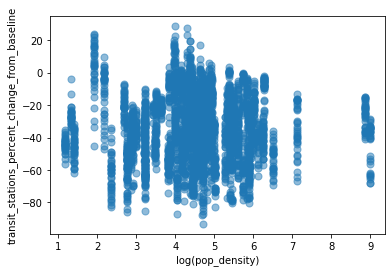

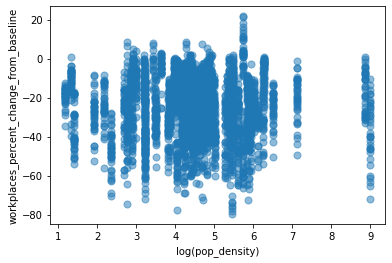

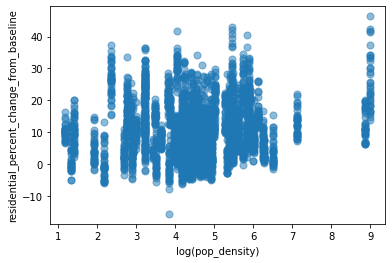

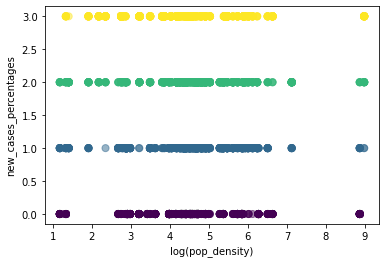

In [ ]:
for col in df4.columns:
  if col == 'new_cases_percentages':
    color_map =[]
    for val in df[col]:
      color_map.append(labels.index(val))
    plt.scatter(np.log(df4.pop_density),df[col],s=50,alpha=0.5,  c=color_map)
    plt.xlabel('log(pop_density)')
    plt.ylabel(col)
  elif col != 'pop_density':
    plt.scatter(np.log(df4.pop_density),df[col],s=50,alpha=0.5)
    plt.xlabel('log(pop_density)')
    plt.ylabel(col)
  
  plt.show()


In [ ]:
mobility = df4.drop(['pop_density','new_cases_percentages'],axis=1,inplace=False)
mobility.columns


Index(['driving', 'walking', 'transit',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline'],
      dtype='object')

In [ ]:
df4['pop_density'].describe()


count    3828.000000
mean      283.358697
std      1010.567694
min         3.247871
25%        46.719504
50%        92.056413
75%       205.418372
max      7952.998418
Name: pop_density, dtype: float64

In [ ]:
df4['quantile_groups'] = pd.qcut(df4['pop_density'], q=5)
# df4.head()
df4['quantile_groups'].value_counts()

(3.2470000000000003, 30.596]    777
(77.471, 107.981]               769
(235.254, 7952.998]             766
(30.596, 77.471]                764
(107.981, 235.254]              752
Name: quantile_groups, dtype: int64

In [ ]:
groups=mobility.groupby(df4['quantile_groups'],dropna=False)

In [ ]:
for name,group in groups:
   print('\n',name)
   correlation_dict = {}
   corr=0.0
   
   for attr in group:
     if(attr not in ['new_cases_percentages','quantile_groups','pop_density']):
       #print(attr)
       corr = group[attr].corr(df4['new_cases_percentages'])
       correlation_dict[(attr)]=(corr)
   print( '\ntop 5 attributes most correlated with new_cases_percentages: ')
   print('{:<55s}{:>12s}'.format( 'Attribute','Correlation value'))
   sorted_corr= sorted(correlation_dict.items(), key=lambda x: abs(x[1]), reverse=True)
   for i, val in enumerate(sorted_corr):
     if(i<5):
       print('{:<55s}{:>12.10f}'.format(val[0],val[1]))
       #print(val[0],'\t', val[1])


 (3.2470000000000003, 30.596]

top 5 attributes most correlated with new_cases_percentages: 
AttributeCorrelation value
workplaces_percent_change_from_baseline                -0.4261082089
retail_and_recreation_percent_change_from_baseline     -0.4100526842
grocery_and_pharmacy_percent_change_from_baseline      -0.3454076426
residential_percent_change_from_baseline               0.3338295175
transit_stations_percent_change_from_baseline          -0.2281787149

 (30.596, 77.471]

top 5 attributes most correlated with new_cases_percentages: 
AttributeCorrelation value
workplaces_percent_change_from_baseline                -0.4554753689
transit_stations_percent_change_from_baseline          -0.3601722132
retail_and_recreation_percent_change_from_baseline     -0.3071778314
grocery_and_pharmacy_percent_change_from_baseline      -0.2954915259
residential_percent_change_from_baseline               0.2616888211

 (77.471, 107.981]

top 5 attributes most correlated with new_cases_percentages: 

Hong Kong Analysis

In [ ]:
hk_df = df.loc[df['country_code']== 'HKG']
hk_df = hk_df[['driving','walking','transit','retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline','new_cases_percentages']].copy()
# hk_df = hk_df.fillna(0,inplace=True)

In [ ]:
correlation_dict = {}
corr=0.0
   
for attr in hk_df:
  if(attr not in ['new_cases_percentages','quantile_groups','pop_density']):
    #print(attr)
    corr = hk_df[attr].corr(hk_df['new_cases_percentages'])
    correlation_dict[(attr)]=(corr)
print( '\ntop 5 attributes most correlated with new_cases_percentages: ')
print('{:<55s}{:>12s}'.format( 'Attribute','Correlation value'))
sorted_corr= sorted(correlation_dict.items(), key=lambda x: abs(x[1]), reverse=True)
for i, val in enumerate(sorted_corr):
  if(i<10):
    print('{:<55s}{:>12.10f}'.format(val[0],val[1]))


top 5 attributes most correlated with new_cases_percentages: 
Attribute                                              Correlation value
transit                                                         nan
retail_and_recreation_percent_change_from_baseline     -0.8072258090
transit_stations_percent_change_from_baseline          -0.7756907794
residential_percent_change_from_baseline               0.7685451567
walking                                                -0.7681955638
workplaces_percent_change_from_baseline                -0.6852078164
parks_percent_change_from_baseline                     -0.6314289522
driving                                                -0.6087139689
grocery_and_pharmacy_percent_change_from_baseline      0.3789623600


In [ ]:

for name,group in groups:
   print('\n',name)

   if (name== (235.254, 7952.998])
   HK_corr_dict = {}
   corr=0.0
   for i,row in group.iterrows():
  #  print(i)
    if(df.iloc[i]['country_code']== 'HKG'):
      print(i, df.iloc[i]['country_code'])
      



 (3.2470000000000003, 30.596]

 (30.596, 77.471]

 (77.471, 107.981]

 (107.981, 235.254]

 (235.254, 7952.998]
29 HKG
134 HKG
200 HKG
639 HKG
645 HKG
654 HKG
712 HKG
769 HKG
816 HKG
844 HKG
892 HKG
950 HKG
1013 HKG
1033 HKG
1089 HKG
1245 HKG
1482 HKG
1694 HKG
1716 HKG
1894 HKG
2036 HKG
2148 HKG
2172 HKG
2180 HKG
2341 HKG
2422 HKG
2590 HKG
2888 HKG
2898 HKG
2974 HKG
2978 HKG
3042 HKG
3047 HKG
3243 HKG
3299 HKG
3407 HKG
3825 HKG


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fde526a4128>,
      dtype=object)

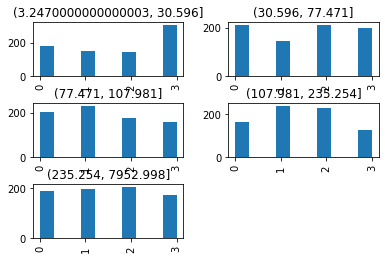

In [ ]:
df4['new_cases_percentages'].hist(by=df4['quantile_groups'])

In [ ]:
df_4_numeric = mobility

# Question 5

####**Cluster-wise analysis of policies that are effective**

First cluster data

In [ ]:
# identifying most implemented policies 
sorted_0 = sorted(combination0.values(),reverse=True)
un =sorted(np.unique(sorted_0),reverse=True)
effective0 = {}
for i in un[:3]:
  for item in combination0.items(): 

    if(item[1]==i):
      # print(item[0], item[1])
      for x in item[0]:
        if x not in effective0.keys():
          effective0[x]= item[1]
          # print(x,effective[x])
# effective0
# combination0

In [ ]:
# storing top policies and countries they are implemented in
pol_country = {}
country_casetrend = []
cols =[]
country_pol = {}

for i,item in df_group_class0.iterrows():
  pols = []
  for pol in sorted(effective0.keys()):
    if df[pol][i]:
      pols.append(1)
    else:
      pols.append(0)
  country_pol[df['country_name'][i]]= pols

for i in country_pol:
  print(i, country_pol[i])

for pol in effective0:
  # print(pol)
  country_list = []
  
  for i,item in df_group_class0.iterrows():
    # print(item)
    if df[pol][i]:
      country_list.append(df['country_name'][i])
    if df['country_name'][i] not in cols:
      # print(df.iloc[[i]])
      cols.append(df['country_name'][i] )
      country_casetrend.append([df['country_name'][i],df['country_code'][i],df['prev_cases'][i], df['total_cases'][i]-df['prev_cases'][i],df['total_cases'][i], df['new_cases_percentages'][i]])
  pol_country[pol]= country_list
casetrend_df_clust0 = pd.DataFrame(country_casetrend, columns= ['country_name','country_code', 'prev_cases','new_cases_3days','total_cases' ,'new_cases_percentages'])
casetrend_df_clust0.sort_values('new_cases_percentages', inplace=True)
casetrend_df_clust0

Bolivia [1, 1, 1, 1, 0]
Guatemala [1, 1, 1, 0, 0]
Lao People's Democratic Republic [0, 0, 1, 1, 1]
Peru [1, 1, 1, 1, 1]
Cambodia [1, 1, 1, 1, 0]
Myanmar [0, 1, 1, 0, 0]
Nicaragua [0, 0, 1, 1, 0]
Nepal [1, 1, 1, 1, 1]
Senegal [0, 0, 1, 0, 1]
Mali [1, 1, 1, 1, 1]


country_name  ... new_cases_percentages
2  Lao People's Democratic Republic  ...                     0
4                          Cambodia  ...                     0
5                           Myanmar  ...                     0
6                         Nicaragua  ...                     0
7                             Nepal  ...                     0
9                              Mali  ...                     0
1                         Guatemala  ...                     2
0                           Bolivia  ...                     3
3                              Peru  ...                     3
8                           Senegal  ...                     3

[10 rows x 6 columns]

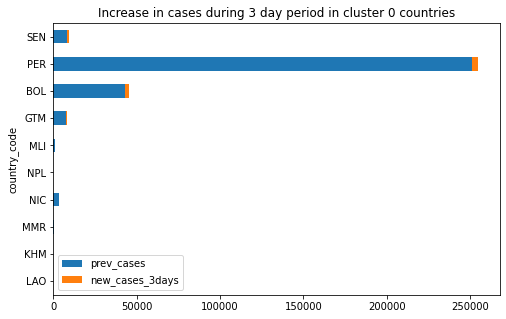

In [ ]:
# increase in cases during 3 day period in cluster 0 countires
ax= casetrend_df_clust0.plot(x = 'country_code',y= ['prev_cases','new_cases_3days'] ,kind="barh",stacked=True,figsize=(8,5),title= 'Increase in cases during 3 day period in cluster 0 countries')#, xticks = [100,300,500,2000,4000,6000,8000,30000,50000,100000,200000,250000] )
ax.settitle('Increase in cases during 3 day period in cluster 0 countries')

# compare GTM vs SEN ->cancel public events, school closing
# BOL vs PER -> contact tracing

In [ ]:
pol_df0 = pd.DataFrame(data= country_pol.values(), index= country_pol.keys(), columns = sorted(effective0.keys()))
pol_df0

C1_School closing_3  ...  H3_Contact tracing_2
Bolivia                                             1  ...                     0
Guatemala                                           1  ...                     0
Lao People's Democratic Republic                    0  ...                     1
Peru                                                1  ...                     1
Cambodia                                            1  ...                     0
Myanmar                                             0  ...                     0
Nicaragua                                           0  ...                     0
Nepal                                               1  ...                     1
Senegal                                             0  ...                     1
Mali                                                1  ...                     1

[10 rows x 5 columns]

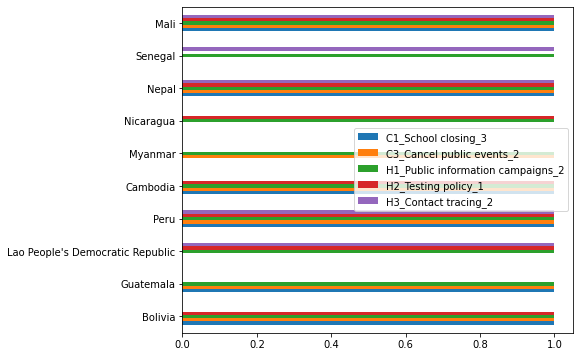

In [ ]:
# plotting policies implemented in each country of the cluster
pol_df0.plot(kind="barh",figsize=(7,6))

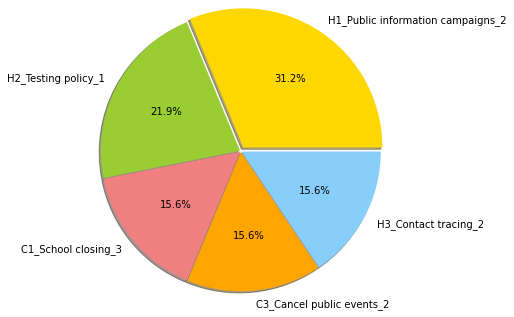

In [ ]:
# percentage implementation of each of the top policies in cluster
plt.pie(effective0.values(),labels= effective0.keys(),shadow=True,explode = [0.05,0.01,0.01,0.01,0.01],autopct='%1.1f%%', colors= ['gold', 'yellowgreen', 'lightcoral','orange','lightskyblue'],radius=1.6)
plt.show()

Second cluster data

In [ ]:
# identifying most implemented policies 
sorted_1 = sorted(combination1.values(),reverse=True)
un =sorted(np.unique(sorted_1),reverse=True)
effective1 = {}
for i in un[:3]:
  for item in combination1.items(): 
    if(item[1]==i):
      # print(item[0], item[1])
      for x in item[0]:
        if x not in effective1.keys():
          effective1[x]= item[1]
          # print(x,effective[x])
effective1
# combination0


{'C1_School closing_3': 13,
 'C2_Workplace closing_2': 13,
 'C3_Cancel public events_2': 13,
 'C8_International travel controls_4': 13,
 'H1_Public information campaigns_2': 13,
 'H2_Testing policy_2': 13}

In [ ]:
pol_country = {}
country_casetrend = []
cols =[]
country_pol = {}

for i,item in df_group_class1.iterrows():
  pols = []
  for pol in sorted(effective1.keys()):
    if df[pol][i]:
      pols.append(1)
    else:
      pols.append(0)
  if(df['new_cases_percentages'][i]>=0):
    country_pol[df['country_name'][i]]= pols

# for i in country_pol:
#   print(i, country_pol[i])

for pol in effective1:
  # print(pol)
  country_list = []
  
  for i,item in df_group_class1.iterrows():
    # print(item)
    if df[pol][i]:
      country_list.append(df['country_name'][i])
    if df['country_name'][i] not in cols:
      # print(df.iloc[[i]])
      cols.append(df['country_name'][i] )
      country_casetrend.append([df['country_name'][i],df['country_code'][i],df['prev_cases'][i], df['total_cases'][i]-df['prev_cases'][i],df['total_cases'][i], df['new_cases_percentages'][i]])
  pol_country[pol]= country_list
casetrend_df_clust1 = pd.DataFrame(country_casetrend, columns= ['country_name','country_code', 'prev_cases','new_cases_3days','total_cases' ,'new_cases_percentages'])
casetrend_df_clust1.sort_values('new_cases_percentages', inplace=True)

# casetrend_df_clust1= casetrend_df_clust1[~(casetrend_df_clust1['new_cases_percentages'] > 1)]
# casetrend_df_clust1
# df_6 = df_6[~((df_6 < (Q1 - 1.5 * IQR)) |(df_6 > (Q3 + 1.5 * IQR))).any(axis=1)]


country_name country_code  ...  total_cases  new_cases_percentages
38                    Iraq          IRQ  ...         2818                      0
17                Thailand          THA  ...         2988                      0
25                 Tunisia          TUN  ...         1186                      0
12                 Vietnam          VNM  ...         1049                      0
8               Uzbekistan          UZB  ...         2509                      0
30                 Uruguay          URY  ...          989                      0
22               Sri Lanka          LKA  ...         1643                      0
4                    Egypt          EGY  ...        97148                      0
9                  Morocco          MAR  ...         6870                      1
27                  Turkey          TUR  ...       164769                      1
32                 Romania          ROU  ...        20945                      1
13              Azerbaijan          AZE  ...         2589                      1
14                 Algeria          DZA  ...        41858                      1
26                 Croatia          HRV  ...         2196                      1
2   Libyan Arab Jamahiriya          LBY  ...          989                      1
18  Bosnia and Herzegovina          BIH  ...         2334                      1
20                  Jordan          JOR  ...         1639                      1
31              Kazakhstan          KAZ  ...         5571                      1
11             El Salvador          SLV  ...          587                      1
28                Honduras          HND  ...         5362                      2
23                  Serbia          SRB  ...        11823                      2
33                Bulgaria          BGR  ...        16454                      2
24                 Albania          ALB  ...         5276                      2
0               Kyrgyzstan          KGZ  ...         3151                      2
7                 Colombia          COL  ...        23003                      2
1                  Ukraine          UKR  ...        14195                      2
21               Venezuela          VEN  ...        20206                      2
19                 Ecuador          ECU  ...        68459                      2
37                 Belarus          BLR  ...        29650                      3
16                Paraguay          PRY  ...         8018                      3
15    Moldova, Republic of          MDA  ...        12254                      3
10            South Africa          ZAF  ...        40792                      3
29                  Panama          PAN  ...        77377                      3
6               Costa Rica          CRI  ...        39699                      3
5                     Oman          OMN  ...        24524                      3
3       Dominican Republic          DOM  ...        89867                      3
34                   Chile          CHL  ...       378168                      3
35             Puerto Rico          PRI  ...        14540                      3
36               Argentina          ARG  ...       100153                      3

[39 rows x 6 columns]

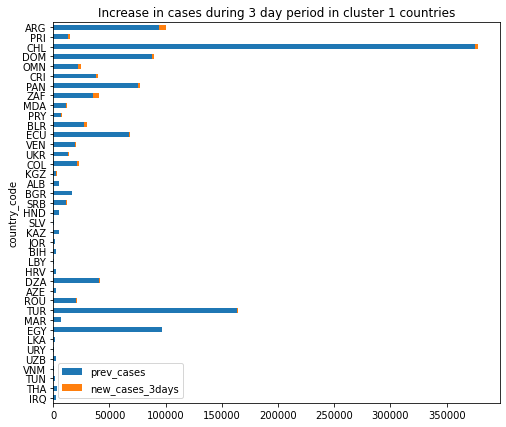

In [ ]:
ax= casetrend_df_clust1.plot(x = 'country_code',y= ['prev_cases','new_cases_3days'] ,kind="barh",stacked=True,figsize=(8,7),title= 'Increase in cases during 3 day period in cluster 1 countries')

#compare ARG/ZAF vs CHL/ TUR

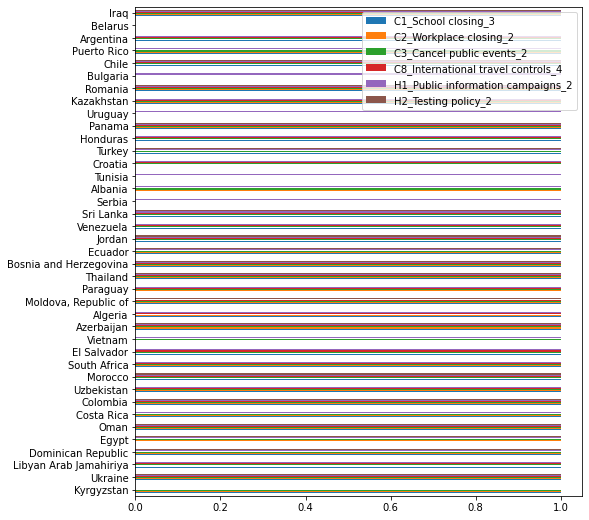

In [ ]:
pol_df1 = pd.DataFrame(data= country_pol.values(), index= country_pol.keys(), columns = sorted(effective1.keys()))
pol_df1.plot(kind="barh",figsize=(8,9))

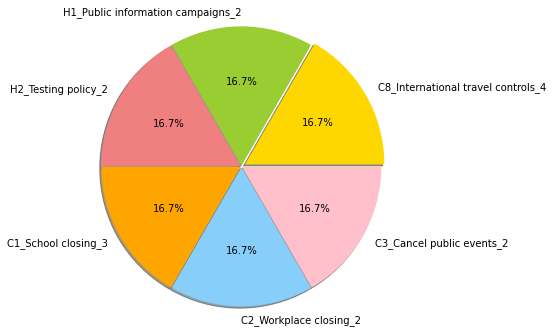

In [ ]:
plt.pie(effective1.values(),labels= effective1.keys(),shadow=True,explode = [0.05,0.01,0.01,0.01,0.01,0.01],autopct='%1.1f%%', colors= ['gold', 'yellowgreen', 'lightcoral','orange','lightskyblue','pink'],radius=1.6)
plt.show()

Third cluster data

In [ ]:
# identifying most implemented policies 
sorted_2 = sorted(combination2.values(),reverse=True)
un =sorted(np.unique(sorted_2),reverse=True)
effective2 = {}
for i in un[:3]:
  for item in combination2.items(): 
    if(item[1]==i):
      # print(item[0], item[1])
      for x in item[0]:
        if x not in effective2.keys():
          effective2[x]= item[1]
          # print(x,effective[x])
effective2

{'C3_Cancel public events_2': 16,
 'H1_Public information campaigns_2': 26,
 'H3_Contact tracing_2': 20}

In [ ]:
pol_country = {}
country_casetrend = []
cols =[]
country_pol = {}

for i,item in df_group_class2.iterrows():
  pols = []
  for pol in sorted(effective2.keys()):
    if df[pol][i]:
      pols.append(1)
    else:
      pols.append(0)
  if(df['new_cases_percentages'][i]>=0):
    country_pol[df['country_name'][i]]= pols

# for i in country_pol:
#   print(i, country_pol[i])

for pol in effective2:
  # print(pol)
  country_list = []
  
  for i,item in df_group_class2.iterrows():
    # print(item)
    if df[pol][i]:
      country_list.append(df['country_name'][i])
    if df['country_name'][i] not in cols:
      # print(df.iloc[[i]])
      cols.append(df['country_name'][i] )
      country_casetrend.append([df['country_name'][i],df['country_code'][i],df['prev_cases'][i], df['total_cases'][i]-df['prev_cases'][i],df['total_cases'][i], df['new_cases_percentages'][i]])
  pol_country[pol]= country_list
casetrend_df_clust2 = pd.DataFrame(country_casetrend, columns= ['country_name','country_code', 'prev_cases','new_cases_3days','total_cases' ,'new_cases_percentages'])
casetrend_df_clust2.sort_values('new_cases_percentages', inplace=True)
# casetrend_df_clust2= casetrend_df_clust2[~(casetrend_df_clust2['new_cases_percentages'] > 1)]
casetrend_df_clust2
# df_6 = df_6[~((df_6 < (Q1 - 1.5 * IQR)) |(df_6 > (Q3 + 1.5 * IQR))).any(axis=1)]

country_name country_code  ...  total_cases  new_cases_percentages
21               Ireland          IRL  ...        25383                      0
20             Australia          AUS  ...         6849                      0
18              Slovenia          SVN  ...         1461                      0
4               Malaysia          MYS  ...         7009                      0
5            New Zealand          NZL  ...         1212                      0
7               Slovakia          SVK  ...         1407                      0
15                Norway          NOR  ...         8411                      0
10           Switzerland          CHE  ...        30882                      0
0                  Italy          ITA  ...       239706                      1
17               Hungary          HUN  ...         3921                      1
16               Germany          DEU  ...       195228                      1
13              Portugal          PRT  ...        25702                      1
12               Finland          FIN  ...         7236                      1
11                Greece          GRC  ...         4166                      1
9                 Poland          POL  ...        35719                      1
3         Czech Republic          CZE  ...         9824                      1
6         United Kingdom          GBR  ...       303181                      2
19          Saudi Arabia          SAU  ...       319932                      2
2                Austria          AUT  ...        23875                      2
1                 Canada          CAN  ...       131495                      2
23  United Arab Emirates          ARE  ...        62525                      2
24                 Spain          ESP  ...       230183                      2
14                Sweden          SWE  ...        47727                      3
8                 Kuwait          KWT  ...        57668                      3
22                France          FRA  ...       335524                      3
25               Denmark          DNK  ...        18356                      3

[26 rows x 6 columns]

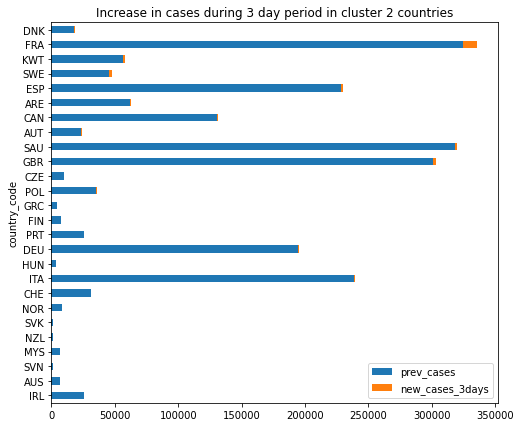

In [ ]:
ax= casetrend_df_clust2.plot(x = 'country_code',y= ['prev_cases','new_cases_3days'] ,kind="barh",stacked=True,figsize=(8,7),title= 'Increase in cases during 3 day period in cluster 2 countries')

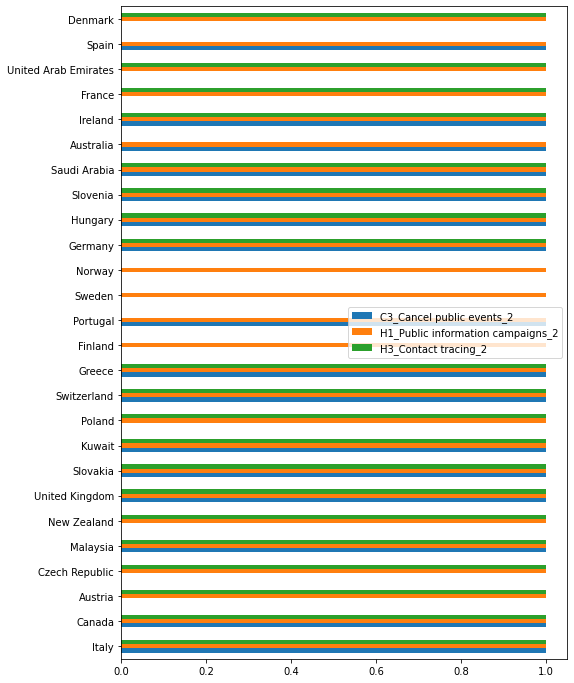

In [ ]:
pol_df2 = pd.DataFrame(data= country_pol.values(), index= country_pol.keys(), columns = sorted(effective2.keys()))
pol_df2.plot(kind="barh",figsize=(8,12))

# compare france vs SAU/GRB -> france to cancel public events

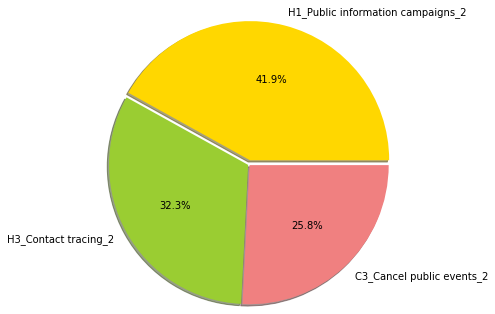

In [ ]:
plt.pie(effective2.values(),labels= effective2.keys(),shadow=True,explode = [0.05,0.01,0.01],autopct='%1.1f%%', colors= ['gold', 'yellowgreen', 'lightcoral','orange','lightskyblue','pink'],radius=1.6)
plt.show()

#### **Policy data analysis of Hong Kong records with different new_cases_percentages**

In [ ]:
HK_df = df.loc[df['country_code']=='HKG']
# HK_df


In [ ]:
Columns=df.columns.tolist()
# print(Columns)
index_start=Columns.index('C1_School closing_1')
index_end=Columns.index('H6_Facial Coverings_4')

HK_df=HK_df.drop(columns=Columns[2:index_start])
HK_df=HK_df.drop(columns=Columns[index_end+1:Columns.index('prev_cases')])


In [ ]:
HK_df.sort_values('new_cases_percentages', inplace=True)
hk_pol_df = HK_df.groupby(['new_cases_percentages'])[Columns[index_start:index_end+1]].sum()
hk_case_df = HK_df.groupby(['new_cases_percentages'])[Columns[-3:-1]].mean()

In [ ]:
hk_case_df['new_cases_3days']= case_df['total_cases']- case_df['prev_cases']
hk_case_df

prev_cases  total_cases  new_cases_3days
new_cases_percentages                                          
0                        1885.750  1895.791667        10.041667
1                        3472.375  3574.125000       101.750000
2                        2513.800  2754.000000       240.200000

In [ ]:
hk_case_df.columns

Index(['prev_cases', 'total_cases', 'new_cases_3days'], dtype='object')

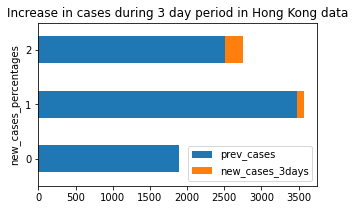

In [ ]:
# plotting increase in cases in HK
ax= hk_case_df.plot(y= ['prev_cases','new_cases_3days'] ,kind="barh",stacked=True,figsize=(5,3),title= 'Increase in cases during 3 day period in Hong Kong data')

In [ ]:
hk_pol_df

C1_School closing_1  ...  H6_Facial Coverings_4
new_cases_percentages                       ...                       
0                                        0  ...                      0
1                                        0  ...                      0
2                                        0  ...                      0

[3 rows x 38 columns]

In [ ]:
pol0 = []
pol1 = []
pol2= []
for pol in hk_pol_df:
  # print(pol_df[col])
  for val,i in zip(hk_pol_df[pol],list(hk_pol_df.index)):
    if val!=0 and i==0:
      pol0.append(pol)
      # print( col, val)
    elif val!=0 and i==1:
      pol1.append(pol)
    elif val!=0 and i==2:
      pol2.append(pol)
 
print(pol0)
print(pol1)
print(pol2)   
    

['C1_School closing_2', 'C1_School closing_3', 'C2_Workplace closing_2', 'C3_Cancel public events_2', 'C4_Restrictions on gatherings_3', 'C4_Restrictions on gatherings_4', 'C6_Stay at home requirements_1', 'C8_International travel controls_4', 'E1_Income support_2', 'E2_Debt/contract relief_2', 'H1_Public information campaigns_2', 'H2_Testing policy_2', 'H2_Testing policy_3', 'H3_Contact tracing_2', 'H6_Facial Coverings_1', 'H6_Facial Coverings_3']
['C1_School closing_2', 'C1_School closing_3', 'C2_Workplace closing_2', 'C3_Cancel public events_2', 'C4_Restrictions on gatherings_3', 'C4_Restrictions on gatherings_4', 'C6_Stay at home requirements_1', 'C8_International travel controls_4', 'E1_Income support_2', 'E2_Debt/contract relief_2', 'H1_Public information campaigns_2', 'H2_Testing policy_2', 'H2_Testing policy_3', 'H3_Contact tracing_2', 'H6_Facial Coverings_1', 'H6_Facial Coverings_3']
['C1_School closing_3', 'C2_Workplace closing_2', 'C3_Cancel public events_2', 'C4_Restriction

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


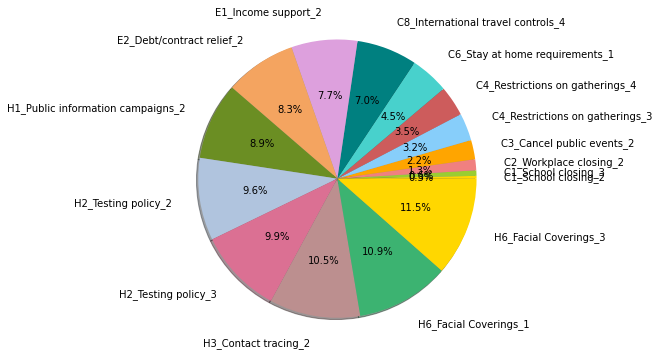


 			   NEW_CASES_PERCENTAGES =0




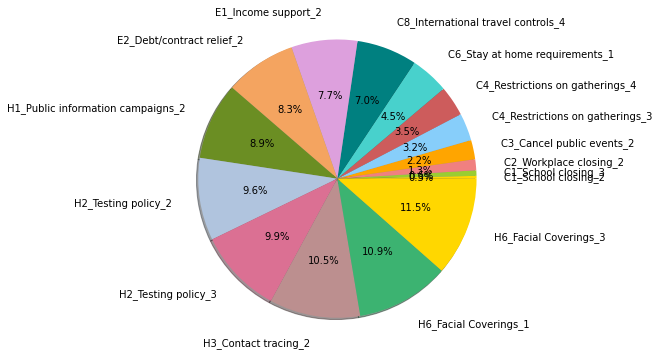


 			   NEW_CASES_PERCENTAGES =1




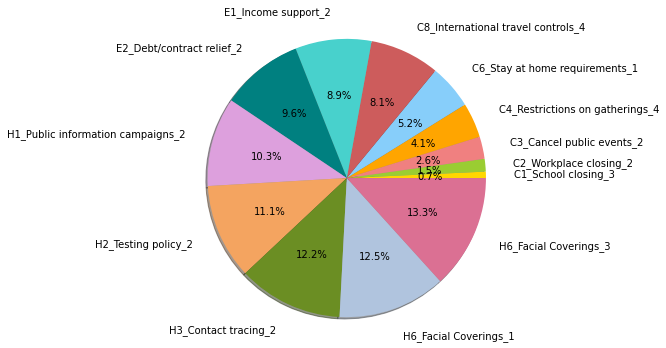


 			   NEW_CASES_PERCENTAGES =2




In [ ]:
import matplotlib.pyplot as plt

pols=[pol0,pol1,pol2]
plt.figure()
colors = ['gold', 'yellowgreen', 'lightcoral','orange','lightskyblue','indianred','mediumturquoise','teal','plum','sandybrown','olivedrab','lightsteelblue','palevioletred','rosybrown','mediumseagreen']
for i in list(hk_pol_df.index):
  
  x= pol_df.loc[i].values.nonzero()
  ax = plt.pie(x,labels=pols[i],shadow=True,autopct='%1.1f%%',radius=1.6,labeldistance=1.2, colors=colors)
  
  plt.show()
  print("\n \t\t\t   NEW_CASES_PERCENTAGES ="+ str(i)+"\n\n")

#### **Policy data analysis of Singapore records with different new_cases_percentages**

In [ ]:
SG_df = df.loc[df['country_code']=='SGP']
# HK_df


In [ ]:
Columns=df.columns.tolist()
# print(Columns)
index_start=Columns.index('C1_School closing_1')
index_end=Columns.index('H6_Facial Coverings_4')

SG_df=SG_df.drop(columns=Columns[2:index_start])
SG_df=SG_df.drop(columns=Columns[index_end+1:Columns.index('prev_cases')])


In [ ]:
SG_df.sort_values('new_cases_percentages', inplace=True)
pol_df =SG_df.groupby(['new_cases_percentages'])[Columns[index_start:index_end+1]].sum()
case_df = SG_df.groupby(['new_cases_percentages'])[Columns[-3:-1]].mean()

In [ ]:
case_df['new_cases_3days']= case_df['total_cases']- case_df['prev_cases']
case_df

prev_cases   total_cases  new_cases_3days
new_cases_percentages                                             
1                      56693.000000  56769.500000             76.5
2                      52216.900000  52452.300000            235.4
3                      37951.090909  38849.590909            898.5

In [ ]:
case_df.columns

Index(['prev_cases', 'total_cases', 'new_cases_3days'], dtype='object')

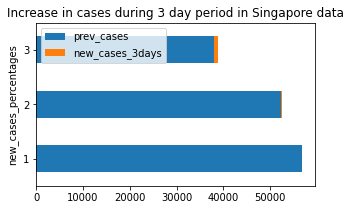

In [ ]:
# plotting increase in cases in SG
ax= case_df.plot(y= ['prev_cases','new_cases_3days'] ,kind="barh",stacked=True,figsize=(5,3),title= 'Increase in cases during 3 day period in Singapore data')

Text(0, 0.5, 'number of new cases')

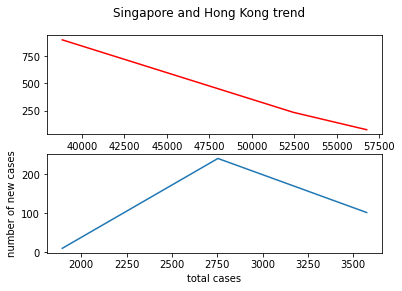

In [ ]:
import matplotlib.pyplot as plt

hk_case_df.sort_values('total_cases', inplace=True)

fig, axs = plt.subplots(2)
fig.suptitle('Singapore and Hong Kong trend')
axs[0].plot(case_df['total_cases'],case_df['new_cases_3days'],color='red')
axs[1].plot(hk_case_df['total_cases'],hk_case_df['new_cases_3days'])
plt.xlabel('total cases')
plt.ylabel('number of new cases')
# ax= plt.subplot[2]
# ax[0].
# ax[1].

In [ ]:
pol_df

C1_School closing_1  ...  H6_Facial Coverings_4
new_cases_percentages                       ...                       
1                                        0  ...                      2
2                                        0  ...                     10
3                                        0  ...                     22

[3 rows x 38 columns]

In [ ]:
pol_df.index

Int64Index([1, 2, 3], dtype='int64', name='new_cases_percentages')

In [ ]:
pol1 = []
pol2 = []
pol3= []
for pol in pol_df:
  # print(pol_df[col])
  for val,i in zip(pol_df[pol],list(pol_df.index)):
    if val!=0 and i==1:
      pol1.append(pol)
      # print( col, val)
    elif val!=0 and i==2:
      pol2.append(pol)
    elif val!=0 and i==3:
      pol3.append(pol)
 
print(pol1)
print(pol2)
print(pol3)   
    

['C1_School closing_2', 'C2_Workplace closing_1', 'C3_Cancel public events_2', 'C4_Restrictions on gatherings_4', 'C6_Stay at home requirements_1', 'C8_International travel controls_2', 'E1_Income support_2', 'E2_Debt/contract relief_2', 'H1_Public information campaigns_2', 'H2_Testing policy_2', 'H3_Contact tracing_2', 'H6_Facial Coverings_4']
['C1_School closing_2', 'C2_Workplace closing_1', 'C3_Cancel public events_2', 'C4_Restrictions on gatherings_4', 'C6_Stay at home requirements_1', 'C8_International travel controls_2', 'E1_Income support_2', 'E2_Debt/contract relief_2', 'H1_Public information campaigns_2', 'H2_Testing policy_2', 'H3_Contact tracing_2', 'H6_Facial Coverings_4']
['C1_School closing_2', 'C1_School closing_3', 'C2_Workplace closing_1', 'C2_Workplace closing_2', 'C2_Workplace closing_3', 'C3_Cancel public events_2', 'C4_Restrictions on gatherings_4', 'C5_Close public transport_1', 'C6_Stay at home requirements_1', 'C6_Stay at home requirements_2', 'C7_Restrictions o

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


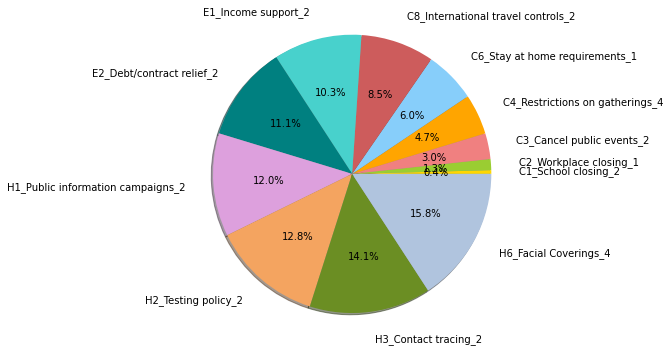


 			   NEW_CASES_PERCENTAGES =1




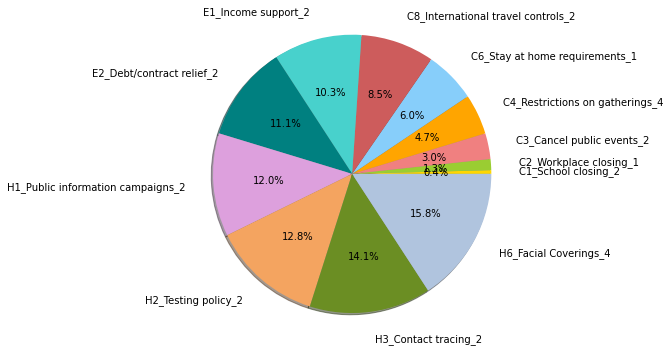


 			   NEW_CASES_PERCENTAGES =2




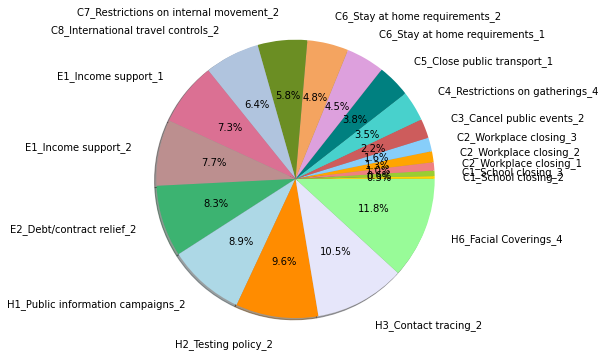


 			   NEW_CASES_PERCENTAGES =3




In [ ]:
import matplotlib.pyplot as plt

pols=[pol1,pol2,pol3]
plt.figure()
colors = ['gold', 'yellowgreen', 'lightcoral','orange','lightskyblue','indianred','mediumturquoise','teal','plum','sandybrown','olivedrab','lightsteelblue','palevioletred','rosybrown','mediumseagreen','lightblue','darkorange','lavender','palegreen']
for i in list(pol_df.index):
  x= pol_df.loc[i].values.nonzero()
  # print(len(pols[i]), len(x) )
  ax = plt.pie(x,labels=pols[i-1],shadow=True,autopct='%1.1f%%',radius=1.6,labeldistance=1.2, colors=colors)
  
  plt.show()
  print("\n \t\t\t   NEW_CASES_PERCENTAGES ="+ str(i)+"\n\n")

####**Using NETWORKX to cluster according to prev_cases**
*   Each country is connected to other countries having the same 1000th number of cases, so that they match in terms of previous cases.
*   The size of each graph node depicts the population density of that node, allowing us to compare regions with similar population density 




In [ ]:
net_df = df[['country_code', 'pop_density','prev_cases', 'new_cases_percentages','total_cases' ]].copy()
net_df.isna().sum()
net_df['pop_density'].fillna(net_df['pop_density'].mean())
net_df.drop_duplicates(subset = 'country_code',inplace=True, keep='last') 
net_df.shape

(107, 5)

In [ ]:
net_df.prev_cases = net_df.prev_cases.round(-3)

In [ ]:
column_edge = 'prev_cases'
column_ID = 'country_code'
# weight = 'pop_density'

data_to_merge = net_df[[column_ID, column_edge]].dropna(subset=[column_edge]) # select columns, remove NaN

# To create connections between countries with same range of prev cases,
# join data with itself on the 'country_code' column.
data_to_merge = data_to_merge.merge(
    data_to_merge[[column_ID, column_edge]].rename(columns={column_ID:column_ID+"_2"}), 
    on=column_edge
)

In [ ]:
d = data_to_merge[~(data_to_merge[column_ID]==data_to_merge[column_ID+"_2"])].dropna()[[column_ID, column_ID+"_2", column_edge]]
    
# To avoid counting twice the connections (node 1->2 and 2->1)
# we force the coiuntry_code to be "lower" then country_code_2
d.drop(d.loc[d[column_ID+"_2"]<d[column_ID]].index.tolist(), inplace=True)
d.head()

country_code country_code_2  prev_cases
1           LAO            VEN           0
3           LAO            MMR           0
5           LAO            NPL           0
12          KHM            LAO           0
13          KHM            VEN           0

In [ ]:
population ={}
for i,row in net_df.iterrows():
  population[net_df.at[i,'country_code']]= net_df.at[i,'pop_density']
  
# population

In [ ]:
import networkx as nx

G = nx.from_pandas_edgelist(df=d, source=column_ID, target=column_ID+'_2', edge_attr=column_edge)

G.add_nodes_from(nodes_for_adding=net_df.country_code.tolist())

In [ ]:
G.edges()

EdgeView([('LAO', 'VEN'), ('LAO', 'MMR'), ('LAO', 'NPL'), ('LAO', 'KHM'), ('LAO', 'ETH'), ('VEN', 'KHM'), ('VEN', 'MMR'), ('VEN', 'ETH'), ('VEN', 'NPL'), ('MMR', 'KHM'), ('MMR', 'NPL'), ('MMR', 'ETH'), ('NPL', 'KHM'), ('NPL', 'ETH'), ('KHM', 'ETH'), ('BFA', 'NZL'), ('BFA', 'MLI'), ('BFA', 'PRY'), ('BFA', 'VNM'), ('BFA', 'TZA'), ('BFA', 'LBY'), ('BFA', 'KGZ'), ('BFA', 'GTM'), ('BFA', 'PSE'), ('BFA', 'YEM'), ('BFA', 'URY'), ('BFA', 'AGO'), ('NZL', 'AGO'), ('NZL', 'PRY'), ('NZL', 'VNM'), ('NZL', 'TZA'), ('NZL', 'PSE'), ('NZL', 'YEM'), ('NZL', 'URY'), ('NZL', 'MLI'), ('NZL', 'LBY'), ('NZL', 'KGZ'), ('NZL', 'GTM'), ('MLI', 'AGO'), ('MLI', 'PRY'), ('MLI', 'VNM'), ('MLI', 'TZA'), ('MLI', 'PSE'), ('MLI', 'YEM'), ('MLI', 'URY'), ('MLI', 'LBY'), ('MLI', 'KGZ'), ('MLI', 'GTM'), ('PRY', 'AGO'), ('PRY', 'VNM'), ('PRY', 'TZA'), ('PRY', 'PSE'), ('PRY', 'YEM'), ('PRY', 'URY'), ('PRY', 'LBY'), ('PRY', 'KGZ'), ('PRY', 'GTM'), ('VNM', 'AGO'), ('VNM', 'YEM'), ('VNM', 'TZA'), ('VNM', 'LBY'), ('VNM', 'KGZ')

In [ ]:
nodes=G.nodes()
print(nodes)

['LAO', 'VEN', 'MMR', 'NPL', 'KHM', 'ETH', 'BFA', 'NZL', 'MLI', 'PRY', 'VNM', 'TZA', 'LBY', 'KGZ', 'GTM', 'PSE', 'YEM', 'URY', 'AGO', 'CRI', 'PRT', 'JPN', 'AUS', 'FIN', 'CHE', 'KWT', 'KEN', 'SLV', 'SEN', 'HKG', 'HTI', 'MYS', 'LKA', 'MOZ', 'SVN', 'HRV', 'JOR', 'LBN', 'ALB', 'CIV', 'BIH', 'SVK', 'TUN', 'THA', 'PRI', 'NIC', 'GRC', 'BGR', 'DNK', 'GHA', 'BGD', 'UZB', 'HND', 'SWE', 'KAZ', 'SDN', 'COL', 'IRL', 'HUN', 'ISR', 'UKR', 'IND', 'SGP', 'SAU', 'PAK', 'QAT', 'NLD', 'KOR', 'BEL', 'ROU', 'PAN', 'CZE', 'ESP', 'IDN', 'NGA', 'GBR', 'BLR', 'AUT', 'EGY', 'CHL', 'OMN', 'BRA', 'CAN', 'IRQ', 'DZA', 'ARE', 'PER', 'DOM', 'ZAF', 'NOR', 'SRB', 'MDA', 'ARG', 'ECU', 'BOL', 'CMR', 'PHL', 'MEX', 'TUR', 'ITA', 'AZE', 'DEU', 'FRA', 'AFG', 'POL', 'RUS', 'MAR']


In [ ]:
for i in list(nodes):
    # print(i) 
    G.nodes[i]['population'] = population[i] 


In [ ]:
G.degree()

DegreeView({'LAO': 5, 'VEN': 5, 'MMR': 5, 'NPL': 5, 'KHM': 5, 'ETH': 5, 'BFA': 12, 'NZL': 12, 'MLI': 12, 'PRY': 12, 'VNM': 12, 'TZA': 12, 'LBY': 12, 'KGZ': 12, 'GTM': 12, 'PSE': 12, 'YEM': 12, 'URY': 12, 'AGO': 12, 'CRI': 2, 'PRT': 2, 'JPN': 2, 'AUS': 1, 'FIN': 1, 'CHE': 1, 'KWT': 1, 'KEN': 3, 'SLV': 3, 'SEN': 3, 'HKG': 3, 'HTI': 1, 'MYS': 1, 'LKA': 8, 'MOZ': 8, 'SVN': 8, 'HRV': 8, 'JOR': 8, 'LBN': 8, 'ALB': 8, 'CIV': 8, 'BIH': 8, 'SVK': 5, 'TUN': 5, 'THA': 5, 'PRI': 5, 'NIC': 5, 'GRC': 5, 'BGR': 2, 'DNK': 2, 'GHA': 2, 'BGD': 1, 'UZB': 1, 'HND': 1, 'SWE': 1, 'KAZ': 1, 'SDN': 1, 'COL': 1, 'IRL': 1, 'HUN': 0, 'ISR': 0, 'UKR': 0, 'IND': 0, 'SGP': 0, 'SAU': 0, 'PAK': 0, 'QAT': 0, 'NLD': 0, 'KOR': 0, 'BEL': 0, 'ROU': 0, 'PAN': 0, 'CZE': 0, 'ESP': 0, 'IDN': 0, 'NGA': 0, 'GBR': 0, 'BLR': 0, 'AUT': 0, 'EGY': 0, 'CHL': 0, 'OMN': 0, 'BRA': 0, 'CAN': 0, 'IRQ': 0, 'DZA': 0, 'ARE': 0, 'PER': 0, 'DOM': 0, 'ZAF': 0, 'NOR': 0, 'SRB': 0, 'MDA': 0, 'ARG': 0, 'ECU': 0, 'BOL': 0, 'CMR': 0, 'PHL': 0, 'MEX'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


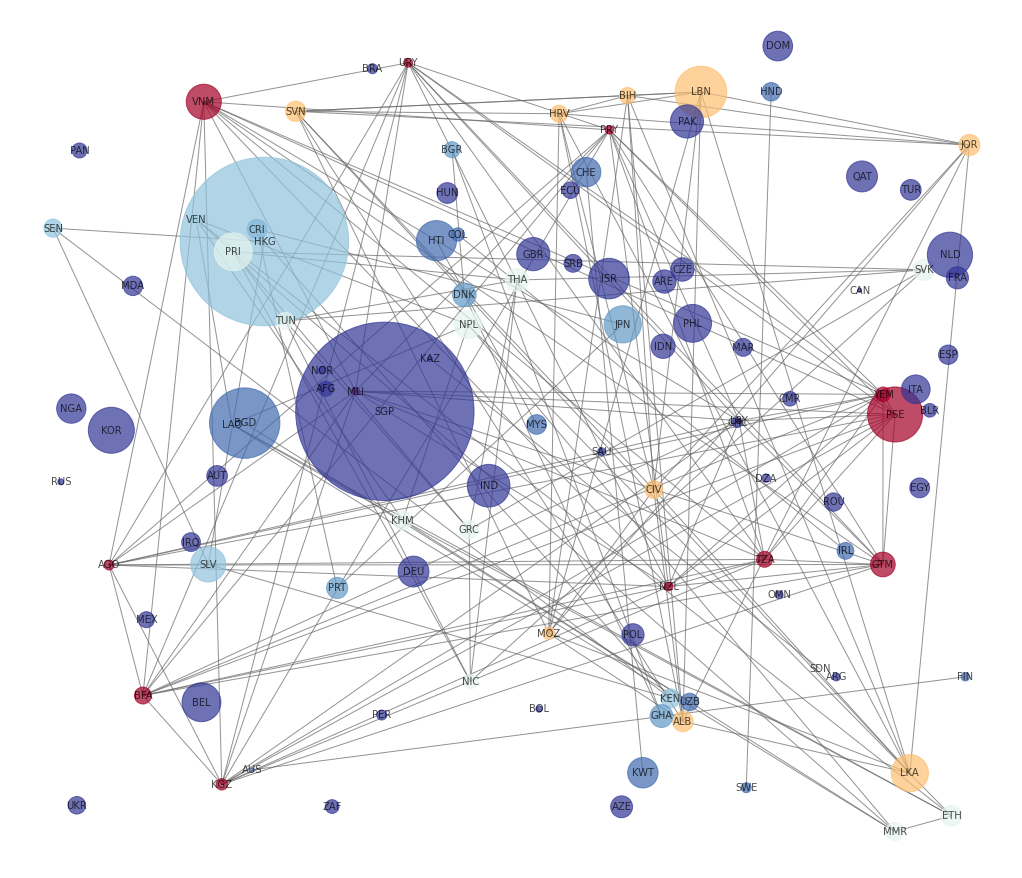

In [ ]:
# fixing the size of the figure 
plt.figure(figsize =(14, 12)) 
  
node_color = [(5*G.degree(v)) for v in G] 
# node colour is a list of degrees of nodes 
  
node_size = [4 * nx.get_node_attributes(G, 'population')[v] for v in G] 
# size of node is a list of population of cities 
  
  
nx.draw_random(G, node_size = node_size, font_size=10,
                 node_color = node_color, alpha = 0.7, 
                 with_labels = True,  
                 edge_color ='.4', cmap = plt.cm.RdYlBu_r )
  
# plt.axis('off') 
plt.savefig('/content/drive/MyDrive/COMP4331 Group project/Network_graph.jpg')
plt.tight_layout() 

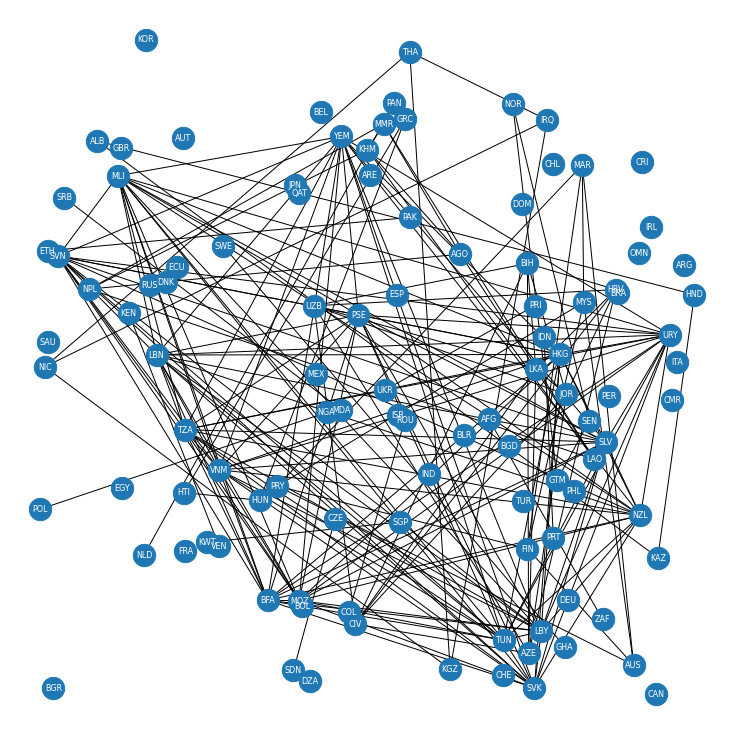

In [ ]:
#plain networkx graph
plt.figure(3,figsize=(10,10)) 
nx.draw_random(G, with_labels=True, node_size=500,font_color='white', font_size= 8)
plt.show()

In [ ]:
# extracting node neighbors of HK 
for val in G.neighbors('HKG'):
  print(net_df.loc[net_df.country_code==val])

     country_code  pop_density  prev_cases  new_cases_percentages  total_cases
3710          KEN    90.299417        3594                      1         3860
     country_code  pop_density  prev_cases  new_cases_percentages  total_cases
3797          SLV   309.881467        3720                      2         3941
     country_code  pop_density  prev_cases  new_cases_percentages  total_cases
3836          SEN    82.347478        4021                      2         4427


In [ ]:
#comparing node-neighbors of HK and comparing SG to HK due to similar pop_density
for val in G.neighbors('HKG'):
  print(net_df.loc[net_df.country_code==val], net_df.loc[net_df.country_code==val]['total_cases']-net_df.loc[net_df.country_code==val]['prev_cases'])
print(net_df.loc[net_df.country_code=='HKG'], net_df.loc[net_df.country_code=='HKG']['total_cases']-net_df.loc[net_df.country_code=='HKG']['prev_cases'])
print(net_df.loc[net_df.country_code=='SGP'], net_df.loc[net_df.country_code=='SGP']['total_cases']-net_df.loc[net_df.country_code=='SGP']['prev_cases'])

     country_code  pop_density  prev_cases  new_cases_percentages  total_cases
3710          KEN    90.299417        3594                      1         3860 3710    266
dtype: int64
     country_code  pop_density  prev_cases  new_cases_percentages  total_cases
3797          SLV   309.881467        3720                      2         3941 3797    221
dtype: int64
     country_code  pop_density  prev_cases  new_cases_percentages  total_cases
3836          SEN    82.347478        4021                      2         4427 3836    406
dtype: int64
     country_code  pop_density  prev_cases  new_cases_percentages  total_cases
3825          HKG  7096.190476        4079                      1         4181 3825    102
dtype: int64
     country_code  pop_density  prev_cases  new_cases_percentages  total_cases
3596          SGP  7952.998418       52205                      3        52825 3596    620
dtype: int64


In [ ]:
from networkx.algorithms.community.quality import modularity
from networkx.algorithms.community.centrality import girvan_newman
modlist =[] 

clusters = list(girvan_newman(G, most_valuable_edge=None))
num_partitions=[]
for c in clusters:
  print(c)
  num_partitions.append(len(c))
  m = modularity(G,c)
  modlist.append(m)

({'LAO'}, {'VEN', 'MMR', 'ETH', 'KHM', 'NPL'}, {'YEM', 'TZA', 'GTM', 'LBY', 'VNM', 'AGO', 'KGZ', 'PSE', 'PRY', 'MLI', 'URY', 'BFA', 'NZL'}, {'PRT', 'JPN', 'CRI'}, {'FIN', 'AUS'}, {'CHE', 'KWT'}, {'KEN', 'SLV', 'SEN', 'HKG'}, {'HTI', 'MYS'}, {'JOR', 'LKA', 'BIH', 'LBN', 'HRV', 'SVN', 'ALB', 'MOZ', 'CIV'}, {'TUN', 'NIC', 'GRC', 'PRI', 'SVK', 'THA'}, {'GHA', 'BGR', 'DNK'}, {'UZB', 'BGD'}, {'HND', 'SWE'}, {'SDN', 'KAZ'}, {'IRL', 'COL'}, {'HUN'}, {'ISR'}, {'UKR'}, {'IND'}, {'SGP'}, {'SAU'}, {'PAK'}, {'QAT'}, {'NLD'}, {'KOR'}, {'BEL'}, {'ROU'}, {'PAN'}, {'CZE'}, {'ESP'}, {'IDN'}, {'NGA'}, {'GBR'}, {'BLR'}, {'AUT'}, {'EGY'}, {'CHL'}, {'OMN'}, {'BRA'}, {'CAN'}, {'IRQ'}, {'DZA'}, {'ARE'}, {'PER'}, {'DOM'}, {'ZAF'}, {'NOR'}, {'SRB'}, {'MDA'}, {'ARG'}, {'ECU'}, {'BOL'}, {'CMR'}, {'PHL'}, {'MEX'}, {'TUR'}, {'ITA'}, {'AZE'}, {'DEU'}, {'FRA'}, {'AFG'}, {'POL'}, {'RUS'}, {'MAR'})
({'LAO'}, {'VEN'}, {'MMR', 'NPL', 'ETH', 'KHM'}, {'YEM', 'TZA', 'GTM', 'LBY', 'VNM', 'AGO', 'KGZ', 'PSE', 'PRY', 'MLI', 'U

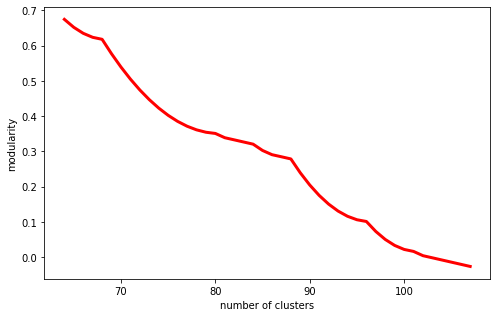

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(num_partitions,modlist,linewidth=3,color='red')

plt.xlabel('number of clusters')
plt.ylabel('modularity')
plt.show()

In [ ]:
from itertools import *
ymax= modlist.index(max(modlist))
ymax

0

In [ ]:
group_count

64

['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen', 

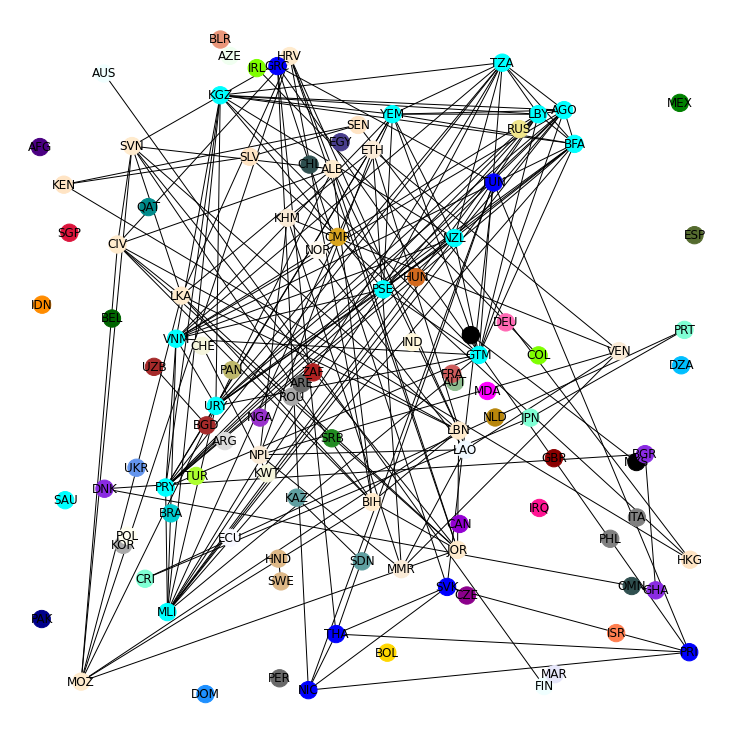

In [ ]:
# clustering networkx acc to Girvan-newman with highest modularity split, gives 64 clusters, not very informative
import random
import matplotlib.colors as mcolors
colors=mcolors.CSS4_COLORS
names= list(mcolors.CSS4_COLORS.keys())
print(names)
node_groups=[]
for c in clusters[ymax]:
  node_groups.append(list(c))
print(node_groups)
group_count = len(node_groups)

color_map = []
for node in G:
  for i in range(group_count):
    if node in node_groups[i]:
        
        color_map.append(colors[names[i]]) 
print(color_map)
plt.figure(3,figsize=(10,10)) 
nx.draw_random(G, node_color=color_map, with_labels=True)
plt.show()


####**Using Association Rule Mining to find combinations of activities that can help predict higher than median cases as percentage of the population**

In [ ]:
df_Columns=df.columns.tolist()
index_start=df_Columns.index('pct_cmnty_sick_weighted')
index_end=df_Columns.index('pct_no_public_weighted')
activitiesCol=df_Columns[index_start:index_end+1]
activitiesData=df[activitiesCol]
activitiesData['pct_mask_not_all_the_time']=activitiesData['pct__all_time_weighted'].apply(lambda x:100-x)
activitiesCol.append('pct_mask_not_all_the_time')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
from mlxtend.frequent_patterns import apriori
median_dict={}
for i in activitiesCol:
    median_dict[i]=activitiesData[i].median()

Transformed_activities_data=pd.DataFrame()
for i in activitiesCol:
    Transformed_activities_data[i] = (activitiesData[i] >= median_dict[i]).astype(int)

frequent_activities= apriori(Transformed_activities_data, min_support=0.3, use_colnames=True)
frequent_activities['length']=frequent_activities['itemsets'].apply(lambda x:len(x))
frequent_activities

support                                           itemsets  length
0   0.500000                          (pct_cmnty_sick_weighted)       1
1   0.500000                         (pct_ever_tested_weighted)       1
2   0.500000                     (pct_tested_recently_weighted)       1
3   0.500000                 (pct_worked_outside_home_weighted)       1
4   0.500259                (pct_grocery_outside_home_weighted)       1
..       ...                                                ...     ...
84  0.399327  (pct_wear_mask_half_time_weighted, pct_wear_ma...       3
85  0.393375  (pct_mask_not_all_the_time, pct_wear_mask_half...       3
86  0.383799  (pct_mask_not_all_the_time, pct_wear_mask_half...       3
87  0.407867  (pct_mask_not_all_the_time, pct_wear_mask_some...       3
88  0.373706  (pct_mask_not_all_the_time, pct_wear_mask_half...       4

[89 rows x 3 columns]

In [ ]:
activitiesData['cases_by_percent']=df['total_cases']/df['pop_total']*100
median_dict['cases_by_percent']=activitiesData['cases_by_percent'].median()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
activitiesData['High_cases_percent'] = (activitiesData['cases_by_percent'] >= median_dict['cases_by_percent']).astype(int)
high_cases_df_3=Transformed_activities_data
high_cases_df_3['High_cases_percent']=activitiesData['High_cases_percent']

high_cases_activities_combinations = apriori(high_cases_df_3, min_support=0.2, use_colnames=True)

from mlxtend.frequent_patterns import association_rules

rules=association_rules(high_cases_activities_combinations, metric="confidence", min_threshold=0.6)

rules['highcases_by_percent_is_consequent']=rules['consequents'].apply(lambda f: 1 if  len(f.intersection(['High_cases_percent']))==1 else 0)

S=rules[rules['highcases_by_percent_is_consequent']==1]

for i in S['antecedents']:
    print(i)
print('\n\n')

frozenset({'pct_ever_tested_weighted'})
frozenset({'pct_tested_recently_weighted'})
frozenset({'pct_cmnty_sick_weighted', 'pct_ever_tested_weighted'})
frozenset({'pct_cmnty_sick_weighted', 'pct_tested_recently_weighted'})
frozenset({'pct_tested_recently_weighted', 'pct_ever_tested_weighted'})
frozenset({'pct_spent_time_with_non_hh_weighted', 'pct_grocery_outside_home_weighted'})





/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


####**Visualising various government indexes with cases**

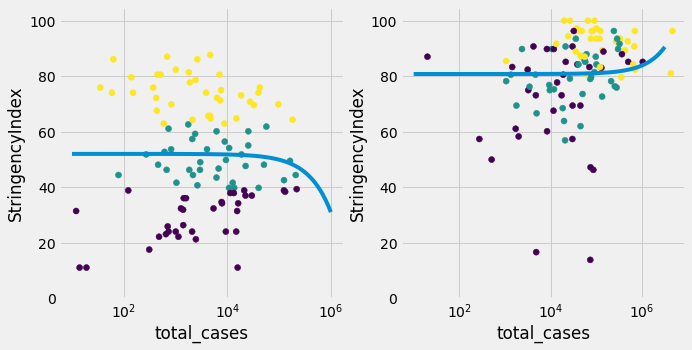

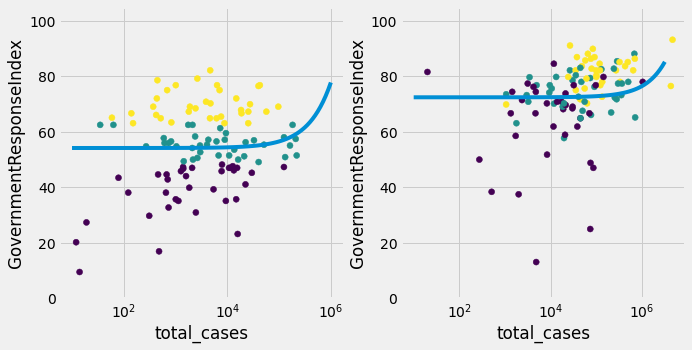

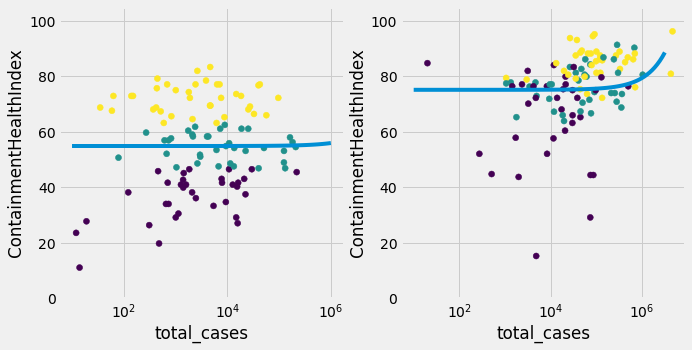

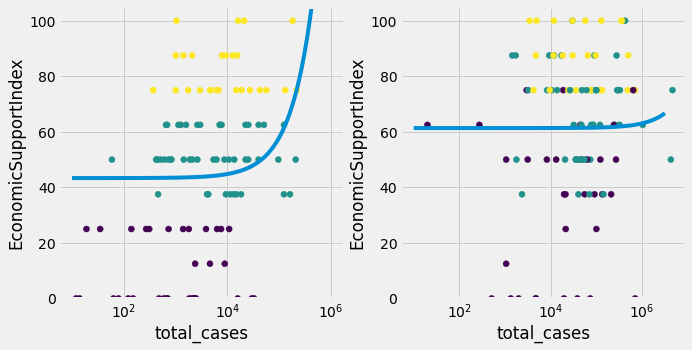

In [ ]:
indeces=['StringencyIndex', 'GovernmentResponseIndex',
       'ContainmentHealthIndex', 'EconomicSupportIndex']
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

reg_res={}
for i in indeces:
    MaxIndex=df.groupby(['country_code'], sort=True)[[i,'total_cases']].max()
    MinIndex=df.groupby(['country_code'], sort=True)[[i,'total_cases']].min()
    T1=MinIndex[i].quantile(0.33)
    T2=MinIndex[i].quantile(0.66)
    MinIndex['class']=MinIndex[i].apply(lambda x: 0 if x<T1 else (2 if x>T2 else 1))
    MaxIndex['class']=MinIndex[i].apply(lambda x: 0 if x<T1 else (2 if x>T2 else 1))
    
    X_max = MaxIndex["total_cases"]
    y_max = MaxIndex[i]

    X_max = sm.add_constant(X_max)
    res_max = sm.OLS(y_max, X_max).fit().params
    
    X_min = MinIndex["total_cases"]
    y_min = MinIndex[i]

    X_min = sm.add_constant(X_min)
    res_min = sm.OLS(y_min, X_min).fit().params
    reg_res[i]=[res_min,res_max]
    
    fig, ax = plt.subplots(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.ylim(0,105)
    #plt.xlim(750,10**6)
    plt.scatter(x=X_min['total_cases'],y=y_min,c=MinIndex['class'])
    plt.xscale('log')
    x_plot=np.logspace(1,6,100)
    plt.plot(x_plot,x_plot*res_min[1]+res_min[0])
    plt.xlabel('total_cases')
    plt.ylabel(i)

    plt.subplot(1, 2, 2)
    plt.ylim(0,105)
    #plt.xlim(750,10**6)
    plt.xscale('log')
    plt.scatter(x=X_max['total_cases'],y=y_max,c=MaxIndex['class'])
    x_plot=np.logspace(1,6.5,100)
    plt.plot(x_plot,x_plot*res_max[1]+res_max[0])
    plt.xlabel('total_cases')
    plt.ylabel(i)




####**Using Clustering on Activities data to guide policy decisions**



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
preprocessor = Pipeline(
    [
        ("scaler", MinMaxScaler()),
        ("pca", PCA(n_components=2, random_state=42)),
    ], verbose=True
)

clusterer = Pipeline(
    [
        (
            "kmeans",
            KMeans(
                n_clusters=4,
                init="k-means++",
                n_init=50,
                max_iter=500,
                random_state=42,
            ),
        ),
    ], verbose=True
)
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("clusterer", clusterer),
    ], verbose=True
)

In [ ]:
maxcasedf=df.groupby(['country_code'], sort=True)[['pct_cmnty_sick_weighted',
 'pct_ever_tested_weighted',
 'pct_tested_recently_weighted',
 'pct_worked_outside_home_weighted',
 'pct_grocery_outside_home_weighted',
 'pct_ate_outside_home_weighted',
 'pct_spent_time_with_non_hh_weighted',
 'pct_attended_public_event_weighted',
 'pct_used_public_transit_weighted',
 'pct_direct_contact_with_non_hh_weighted',
 'pct__all_time_weighted',
 'pct_wear_mask_most_time_weighted',
 'pct_wear_mask_half_time_weighted',
 'pct_wear_mask_some_time_weighted',
 'pct_wear_mask_none_time_weighted',
 'pct_no_public_weighted','total_cases','new_cases_percentages']].max()


pct_cmnty_sick_weighted  ...  new_cases_percentages
country_code                           ...                       
AFG                         65.870000  ...                      2
AGO                         13.826667  ...                      1
ALB                         35.600000  ...                      3
ARE                         15.660000  ...                      3
ARG                         20.860000  ...                      3
...                               ...  ...                    ...
UZB                         42.713333  ...                      2
VEN                         25.260000  ...                      3
VNM                          5.243333  ...                      0
YEM                         52.123333  ...                      1
ZAF                         25.660000  ...                      3

[107 rows x 18 columns]

In [ ]:
df_similarity=maxcasedf
pipe.fit(df_similarity)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing pca, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ............ (step 1 of 1) Processing kmeans, total=   0.2s
[Pipeline] ......... (step 2 of 2) Processing clusterer, total=   0.2s


Pipeline(memory=None,
         steps=[('preprocessor',
                 Pipeline(memory=None,
                          steps=[('scaler',
                                  MinMaxScaler(copy=True,
                                               feature_range=(0, 1))),
                                 ('pca',
                                  PCA(copy=True, iterated_power='auto',
                                      n_components=2, random_state=42,
                                      svd_solver='auto', tol=0.0,
                                      whiten=False))],
                          verbose=True)),
                ('clusterer',
                 Pipeline(memory=None,
                          steps=[('kmeans',
                                  KMeans(algorithm='auto', copy_x=True,
                                         init='k-means++', max_iter=500,
                                         n_clusters=4, n_init=50, n_jobs=None,
                                         precompu

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


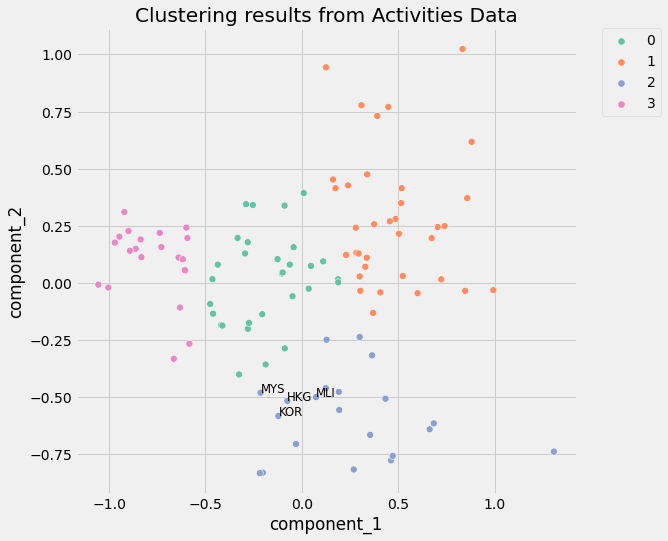

In [ ]:
pcadf = pd.DataFrame(
    pipe["preprocessor"].transform(df_similarity),
    columns=["component_1", "component_2"],index=maxcasedf.index
)
pcadf["predicted_cluster"] = pipe["clusterer"]["kmeans"].labels_

HKG=maxcasedf.loc['HKG',:].to_frame().transpose()
HKG_transformed = pd.DataFrame(
    pipe["preprocessor"].transform(HKG),
    columns=["component_1", "component_2"],
)
HKG_transformed

plt.style.use("fivethirtyeight")

plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
       "component_1",
       "component_2",
       s=50,
       data=pcadf,
       hue="predicted_cluster",
       palette="Set2",
   )

scat.set_title(
       "Clustering results from Activities Data"
   )
for line in range(0,pcadf.shape[0]):
    if (pcadf.index[line] in ['HKG','KOR','MYS','MLI']):
         plt.text(pcadf["component_1"][line], pcadf["component_2"][line], 
         pcadf.index[line], horizontalalignment='left', 
         size='small', color='black')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)



plt.show()

In [ ]:
SimilartoHK=df.loc[ df['country_code'].isin( ['HKG','KOR','MYS','MLI'])]
pd.set_option('display.max_columns', None)
SimilartoHK=SimilartoHK.groupby(['country_code'], sort=True).mean()
SimilartoHK

pop_total  pop_density           GDP  basic_water  safe_water  \
country_code                                                                   
HKG            7507400.0  7096.190476  62375.119370   100.000000  100.000000   
KOR           51709098.0   529.358501  43028.896350    99.787655   98.213861   
MLI           19658031.0    15.635016   2423.828765    78.260830         NaN   
MYS           31949777.0    95.962821  29525.577360    96.695939   93.329278   

               basic_san   safe_san  C1_School closing_1  C1_School closing_2  \
country_code                                                                    
HKG            96.436224  91.773449                  0.0             0.351351   
KOR           100.000000  99.904309                  0.0             0.052632   
MLI            39.335420  18.709404                  0.0             0.100000   
MYS            99.572036  88.633912                  0.0             0.486486   

              C1_School closing_3  C2_Workplace closing_1  \
country_code                                                
HKG                      0.594595                     0.0   
KOR                      0.894737                     0.0   
MLI                      0.800000                     0.8   
MYS                      0.405405                     0.0   

              C2_Workplace closing_2  C2_Workplace closing_3  \
country_code                                                   
HKG                         0.621622                0.000000   
KOR                         1.000000                0.000000   
MLI                         0.200000                0.000000   
MYS                         0.972973                0.027027   

              C3_Cancel public events_1  C3_Cancel public events_2  \
country_code                                                         
HKG                                 0.0                   0.783784   
KOR                                 0.5                   0.421053   
MLI                                 0.0                   1.000000   
MYS                                 0.0                   1.000000   

              C4_Restrictions on gatherings_1  \
country_code                                    
HKG                                       0.0   
KOR                                       0.0   
MLI                                       0.0   
MYS                                       0.0   

              C4_Restrictions on gatherings_2  \
country_code                                    
HKG                                  0.000000   
KOR                                  0.000000   
MLI                                  0.000000   
MYS                                  0.837838   

              C4_Restrictions on gatherings_3  \
country_code                                    
HKG                                  0.486486   
KOR                                  0.000000   
MLI                                  1.000000   
MYS                                  0.108108   

              C4_Restrictions on gatherings_4  C5_Close public transport_1  \
country_code                                                                 
HKG                                  0.486486                          0.0   
KOR                                  0.736842                          0.0   
MLI                                  0.000000                          0.0   
MYS                                  0.000000                          0.0   

              C5_Close public transport_2  C6_Stay at home requirements_1  \
country_code                                                                
HKG                                   0.0                        1.000000   
KOR                                   0.0                        0.736842   
MLI                                   0.0                        0.200000   
MYS                                   0.0                        0.324324   

              C6_Stay at home requirements_2  C6_Stay at 

# Question 6


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, TensorDataset, DataLoader

from sklearn.preprocessing import StandardScaler
from scipy import stats
from statistics import mean
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/COMP4331 Group project/covid_train.csv")

In [ ]:
df_6 = df[['pop_total', 'pop_density', 'GDP', 'basic_water', 'safe_water',
       'basic_san', 'safe_san', 'StringencyIndex', 'GovernmentResponseIndex',
       'ContainmentHealthIndex', 'EconomicSupportIndex', 'pct_fever_weighted',
       'pct_cough_weighted', 'pct_difficulty_breathing_weighted',
       'pct_fatigue_weighted', 'pct_stuffy_runny_nose_weighted',
       'pct_aches_muscle_pain_weighted', 'pct_sore_throat_weighted',
       'pct_chest_pain_weighted', 'pct_nausea_weighted',
       'pct_anosmia_ageusia_weighted', 'pct_eye_pain_weighted',
       'pct_headache_weighted', 'pct_chills_weighted', 
       'pct_cmnty_sick_weighted', 'pct_ever_tested_weighted',
       'pct_tested_recently_weighted', 'pct_worked_outside_home_weighted',
       'pct_grocery_outside_home_weighted', 'pct_ate_outside_home_weighted',
       'pct_spent_time_with_non_hh_weighted',
       'pct_attended_public_event_weighted',
       'pct_used_public_transit_weighted',
       'pct_direct_contact_with_non_hh_weighted', 'pct__all_time_weighted',
       'pct_wear_mask_most_time_weighted', 'pct_wear_mask_half_time_weighted',
       'pct_wear_mask_some_time_weighted', 'pct_wear_mask_none_time_weighted',
       'pct_no_public_weighted', 'driving', 'walking', 'transit',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'prev_cases',
       'new_cases_percentages']].copy()

df_6

pop_total  pop_density  ...  prev_cases  new_cases_percentages
0       6456900    32.965589  ...        2789                      2
1      60297396   205.418372  ...      238833                      1
2      37589262     4.075188  ...      130493                      2
3      11513100    10.480146  ...       42984                      3
4       8877067   107.127967  ...       23373                      2
...         ...          ...  ...         ...                    ...
3859  144373535     8.822068  ...      966189                      2
3860   69625582   135.897207  ...        3202                      0
3861  126264931   347.073458  ...       25736                      1
3862   50339443    44.748702  ...       24104                      2
3863   36471769    80.728519  ...       62590                      2

[3864 rows x 51 columns]

In [ ]:
df_6.isnull().sum().sum()

11373

In [ ]:
df_6_withoutclass = df_6.drop(columns="new_cases_percentages")

In [ ]:
# 1. replace all NaN values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(df_6_withoutclass)
df_6_withoutclass = imp_mean.transform(df_6_withoutclass)
df_6_withoutclass = pd.DataFrame(df_6_withoutclass)

In [ ]:
#2. standardize the data
for i in df_6_withoutclass:
    df_6_withoutclass[i] = StandardScaler().fit_transform(df_6_withoutclass[i].values.reshape(-1, 1))

In [ ]:
#3. remove outliers
Q1 = df_6_withoutclass.quantile(0.25)
Q3 = df_6_withoutclass.quantile(0.75)
IQR = Q3 - Q1
df_6_withoutclass = df_6_withoutclass[~((df_6_withoutclass < (Q1 - 1.5 * IQR)) |(df_6_withoutclass > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df_6_withoutclass["new_cases_percentages"] = df_6["new_cases_percentages"]
df_6 = df_6_withoutclass
df_6

0         1         2  ...        48        49  new_cases_percentages
0    -0.321534 -0.244963 -0.931539  ... -1.595482 -0.287264                      2
5    -0.291579 -0.141019  0.742176  ... -0.660506 -0.264509                      1
6    -0.140265 -0.182416  0.153518  ...  1.168794 -0.273587                      0
8    -0.051842 -0.201214 -0.576523  ... -0.172693 -0.253023                      2
10   -0.291086 -0.059287 -0.313039  ...  0.518376 -0.006164                      3
...        ...       ...       ...  ...       ...       ...                    ...
3855 -0.342832 -0.258126 -0.165435  ...  0.030563 -0.293035                      1
3856 -0.291247 -0.195023  0.238043  ... -1.148319 -0.285900                      0
3860  0.127632 -0.142767 -0.310970  ... -0.579204 -0.285903                      0
3862 -0.009504 -0.233265 -0.472661  ...  1.575305 -0.217053                      2
3863 -0.108111 -0.197542 -0.825294  ... -0.172693 -0.090282                      2

[1266 rows x 51 columns]

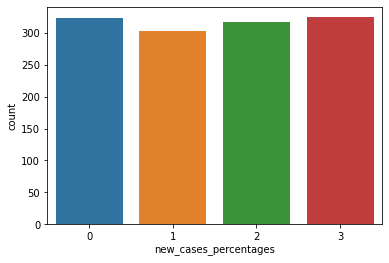

In [ ]:
#check if the data is balanced across different classes
sns.countplot(x = 'new_cases_percentages', data=df_6)
plt.show()

In [ ]:
# Split into input and target
X = df_6.iloc[:, 0:-1]
y = df_6.iloc[:, -1]

# convert Dataframe to numpy array
X_train, y_train = np.array(X), np.array(y)

In [ ]:
class ClassifierDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())


In [ ]:
target_list = []
for _, t in train_dataset:
    target_list.append(t)
    
target_list = torch.tensor(target_list)
target_list = target_list[torch.randperm(len(target_list))]

In [ ]:
# Hyperparameter tuning
EPOCHS = 50
BATCH_SIZE = 8
LEARNING_RATE = 0.0005
NUM_FEATURES = len(X.columns)
NUM_CLASSES = 4

In [ ]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle = True)

In [ ]:
class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x

In [ ]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc) * 100
    
    return acc

In [ ]:
model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
print(model)

MulticlassClassification(
  (layer_1): Linear(in_features=50, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=4, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [ ]:
accuracy_stats = {"train":[],"test":[]}
loss_stats = {"train":[],"test":[]}
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = multi_acc(y_train_pred, y_train_batch)
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
    
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
            
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}')

Begin training.


Epoch 001: | Train Loss: 1.11607 | Train Acc: 42.138
Epoch 002: | Train Loss: 0.93460 | Train Acc: 59.119
Epoch 003: | Train Loss: 0.84395 | Train Acc: 68.553
Epoch 004: | Train Loss: 0.78912 | Train Acc: 79.245
Epoch 005: | Train Loss: 0.73126 | Train Acc: 81.761
Epoch 006: | Train Loss: 0.70999 | Train Acc: 82.390
Epoch 007: | Train Loss: 0.67859 | Train Acc: 80.503
Epoch 008: | Train Loss: 0.68824 | Train Acc: 82.390
Epoch 009: | Train Loss: 0.66955 | Train Acc: 84.277
Epoch 010: | Train Loss: 0.63171 | Train Acc: 88.679
Epoch 011: | Train Loss: 0.61365 | Train Acc: 89.308
Epoch 012: | Train Loss: 0.61307 | Train Acc: 89.937
Epoch 013: | Train Loss: 0.64115 | Train Acc: 85.535
Epoch 014: | Train Loss: 0.60019 | Train Acc: 93.082
Epoch 015: | Train Loss: 0.56583 | Train Acc: 93.082
Epoch 016: | Train Loss: 0.54229 | Train Acc: 94.969
Epoch 017: | Train Loss: 0.55307 | Train Acc: 89.937
Epoch 018: | Train Loss: 0.56583 | Train Acc: 92.453
Epoch 019: | Train Loss: 0.53430 | Train Acc: 

In [ ]:
#Save model
torch.save(model, "/content/drive/MyDrive/COMP4331 Group project/model.pt")

In [ ]:
model = torch.load("/content/drive/MyDrive/COMP4331 Group project/model.pt")
model

MulticlassClassification(
  (layer_1): Linear(in_features=50, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=4, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [ ]:
#Testing 

df_test = pd.read_csv("covid_test.csv")

df_test = df_test[['pop_total', 'pop_density', 'GDP', 'basic_water', 'safe_water',
       'basic_san', 'safe_san', 'StringencyIndex', 'GovernmentResponseIndex',
       'ContainmentHealthIndex', 'EconomicSupportIndex', 'pct_fever_weighted',
       'pct_cough_weighted', 'pct_difficulty_breathing_weighted',
       'pct_fatigue_weighted', 'pct_stuffy_runny_nose_weighted',
       'pct_aches_muscle_pain_weighted', 'pct_sore_throat_weighted',
       'pct_chest_pain_weighted', 'pct_nausea_weighted',
       'pct_anosmia_ageusia_weighted', 'pct_eye_pain_weighted',
       'pct_headache_weighted', 'pct_chills_weighted', 
       'pct_cmnty_sick_weighted', 'pct_ever_tested_weighted',
       'pct_tested_recently_weighted', 'pct_worked_outside_home_weighted',
       'pct_grocery_outside_home_weighted', 'pct_ate_outside_home_weighted',
       'pct_spent_time_with_non_hh_weighted',
       'pct_attended_public_event_weighted',
       'pct_used_public_transit_weighted',
       'pct_direct_contact_with_non_hh_weighted', 'pct__all_time_weighted',
       'pct_wear_mask_most_time_weighted', 'pct_wear_mask_half_time_weighted',
       'pct_wear_mask_some_time_weighted', 'pct_wear_mask_none_time_weighted',
       'pct_no_public_weighted', 'driving', 'walking', 'transit',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'prev_cases',
       'new_cases_percentages']].copy()


df_test_withoutclass = df_test.drop(columns="new_cases_percentages")

# 1. replace all NaN values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(df_test_withoutclass)
df_test_withoutclass = imp_mean.transform(df_test_withoutclass)
df_test_withoutclass = pd.DataFrame(df_test_withoutclass)

#2. standardize the data
for i in df_test_withoutclass:
    df_test_withoutclass[i] = StandardScaler().fit_transform(df_test_withoutclass[i].values.reshape(-1, 1))
    
#3. remove outliers
Q1 = df_test_withoutclass.quantile(0.25)
Q3 = df_test_withoutclass.quantile(0.75)
IQR = Q3 - Q1
df_test_withoutclass = df_test_withoutclass[~((df_test_withoutclass < (Q1 - 1.5 * IQR)) |(df_test_withoutclass > (Q3 + 1.5 * IQR))).any(axis=1)]

df_test_withoutclass["new_cases_percentages"] = df_test["new_cases_percentages"]
df_test = df_test_withoutclass

X_test = df_test.iloc[:, 0:-1]
y_test = df_test.iloc[:, -1]
X_test, y_test = np.array(X_test), np.array(y_test)

test_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

print("Begin testing.")
for e in tqdm(range(1, EPOCHS+1)):
     with torch.no_grad():
          test_epoch_loss = 0
          test_epoch_acc = 0
        
          model.eval()
          for X_test_batch, y_test_batch in test_loader:
              X_test_batch, y_test_batch = X_test_batch.to(device), y_test_batch.to(device)
            
              y_test_pred = model(X_test_batch)
                        
              test_loss = criterion(y_test_pred, y_test_batch)
              test_acc = multi_acc(y_test_pred, y_test_batch)
            
              test_epoch_loss += test_loss.item()
              test_epoch_acc += test_acc.item()
     
     loss_stats['test'].append(test_epoch_loss/len(test_loader))
     accuracy_stats['test'].append(test_epoch_acc/len(test_loader))
                              
    
     print(f'Epoch {e+0:03}: | Test Loss: {test_epoch_loss/len(test_loader):.5f} | Test Acc: {test_epoch_acc/len(test_loader):.3f}')


In [ ]:
# Create dataframes
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
# Plot the dataframes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')

In [ ]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        _, y_pred_tags = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tags.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [ ]:
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_test, y_pred_list))

sns.heatmap(confusion_matrix_df, annot=True)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_list))